#Logistic Regression

1. What is Logistic Regression, and how does it differ from Linear Regression?


- Logistic Regression is a statistical method used for binary classification problems. It predicts the probability of an outcome belonging to a particular category, typically represented as 0 or 1.  

Differences from Linear Regression:  
Output Type:  
Linear Regression predicts continuous values.  
Logistic Regression predicts probabilities and classifies data into discrete categories (0 or 1).  
Function Used:  
Linear Regression uses a linear function: ( y = \beta_0 + \beta_1x )
Logistic Regression applies a Sigmoid function to convert the output into a probability.  
Interpretation:  
Linear Regression finds the best fit line.
Logistic Regression finds a decision boundary to separate classes.  

2. What is the mathematical equation of Logistic Regression?


- The equation of Logistic Regression is:  

 [ P(Y=1 | X) = \frac{1}{1 + e^{- (\beta_0 + \beta_1X)}} ]

 Where:

 ( P(Y=1 | X) ) is the probability that output is 1.  
( \beta_0, \beta_1 ) are the model coefficients.  
( X ) is the input variable.  
The Sigmoid function is used to map the output between 0 and 1.


3. Why do we use the Sigmoid function in Logistic Regression?  


- The Sigmoid function converts any real-valued number into a probability between 0 and 1:

 [ sigmoid(z) = \frac{1}{1 + e^{-z}} ]

 Reasons for using Sigmoid:  
Probability Interpretation: The output is always between 0 and 1, making it suitable for classification.  
Non-linearity: Helps model complex relationships.  
Decision Boundary: Classifies data based on a probability threshold (e.g., 0.5).  


4. What is the cost function of Logistic Regression?

- The log loss function (Binary Cross-Entropy Loss) is used:  

 [ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right] ]

 Where:

 ( y_i ) is the actual label (0 or 1).    
( h_\theta(x_i) ) is the predicted probability.  
( m ) is the number of observations.  
This function penalizes incorrect predictions, ensuring that the model minimizes error.  

5. What is Regularization in Logistic Regression? Why is it needed?


- Regularization is used to prevent overfitting by adding a penalty term to the cost function.

 Types of Regularization:  
L1 Regularization (Lasso): Adds the absolute value of coefficients.  
L2 Regularization (Ridge): Adds the squared value of coefficients.  
Why is it needed?  
Prevents the model from memorizing noise.  
Reduces model complexity.  
Improves generalization on unseen data.  


6. Explain the difference between Lasso, Ridge, and Elastic Net regression.


- | Regularization | Penalty Term | Effect | |--------------|-------------|--------| | Lasso (L1) | ( \lambda \sum |\beta_i| ) | Shrinks some coefficients to zero, useful for feature selection. | | Ridge (L2) | ( \lambda \sum \beta_i^2 ) | Reduces coefficient values but doesn’t make them zero. | | Elastic Net | ( \lambda_1 \sum |\beta_i| + \lambda_2 \sum \beta_i^2 ) | A mix of L1 and L2 regularization. |

7. When should we use Elastic Net instead of Lasso or Ridge?


- Elastic Net is preferred when:

 There are correlated features – Lasso may randomly select one and ignore others, while Elastic Net keeps them together.  
Lasso selects too few features – Elastic Net balances selection and shrinkage.  


8. What is the impact of the regularization parameter (λ) in Logistic Regression?

- Higher λ → More regularization → Smaller coefficients → Simpler model.  
Lower λ → Less regularization → More complex model.  
Too high λ → Underfitting.  
Too low λ → Overfitting.  


9. What are the key assumptions of Logistic Regression?


- Independent observations – No multicollinearity among predictors.  
Linearity in log-odds – Relationship between features and log-odds is linear.  
No missing values – Data should be complete.  


10. What are some alternatives to Logistic Regression for classification tasks?


- Decision Trees  
Random Forest   
Support Vector Machines (SVM)  
Neural Networks  
Naïve Bayes  


11. What are Classification Evaluation Metrics?

- Accuracy  
Precision, Recall, F1-score  
ROC-AUC Curve  
Confusion Matrix  


12. How does class imbalance affect Logistic Regression?


- Leads to biased predictions towards the majority class.  
Solutions: SMOTE, Class weights adjustment, Threshold tuning.  


Q13. What is Hyperparameter Tuning in Logistic Regression?


- Adjusting parameters like regularization strength (λ) and solver to improve performance.  
Done using GridSearchCV or RandomizedSearchCV.  


14. What are different solvers in Logistic Regression? Which one should be used?

15. How is Logistic Regression extended for multiclass classification?


- One-vs-Rest (OvR) – Trains one model per class.  
Softmax Regression (Multinomial) – Generalizes Logistic Regression for multiple classes.  


16. Advantages and Disadvantages of Logistic Regression  


- Advantages:  

 Simple and interpretable.  
Works well for small datasets.  
Disadvantages:  

 Assumes linear relationship in log-odds.
Struggles with non-linearly separable data.


17. Use Cases of Logistic Regression

- Spam detection  
Medical diagnosis (e.g., cancer detection)  
Credit scoring  

18. Difference between Softmax Regression and Logistic Regression


- Logistic Regression: Used for binary classification.  
Softmax Regression: Used for multiclass classification.  


19. One-vs-Rest (OvR) vs Softmax for Multiclass Classification


- OvR: Suitable for unbalanced data.
Softmax: Preferred for balanced datasets.


20. Interpreting Coefficients in Logistic Regression  


- Positive coefficient: Increases probability of class 1.
Negative coefficient: Decreases probability of class 1.
Magnitude: Larger values have a stronger impact.



In [1]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression, and prints the model's accuracy.
    """
    print("--- Starting Logistic Regression Model Accuracy Example ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for classification tasks.
    # It contains measurements of iris flowers and their species.
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    # train_test_split divides the data into two subsets:
    # X_train, y_train: used for training the model.
    # X_test, y_test: used for evaluating the model's performance on unseen data.
    # test_size=0.3 means 30% of the data will be used for testing.
    # random_state ensures the split is reproducible.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply Logistic Regression
    # Initialize the Logistic Regression model.
    # random_state is set for reproducibility of the internal random number generator.
    # max_iter is increased to ensure convergence for some datasets.
    model = LogisticRegression(random_state=42, max_iter=200)

    # Train the model using the training data.
    # The model learns the relationship between features (X_train) and the target (y_train).
    print("Training the Logistic Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    # Use the trained model to predict the target variable for the unseen test data.
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    # Accuracy is the proportion of correctly classified instances (predictions)
    # out of the total number of instances in the test set.
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set: {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the flowers in the test set.")
    print("The classification report provides a more detailed breakdown of performance per class.")

    print("\n--- Logistic Regression Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Model Accuracy Example ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the Logistic Regression model...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set: 0.9333

--- Additional Evaluation Metrics ---
Classification Report:
              precision    recall  f1-score   support

      

In [2]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression with L1 regularization (Lasso),
    and prints the model's accuracy.
    """
    print("--- Starting Logistic Regression Model Accuracy Example with L1 Regularization ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for classification tasks.
    # It contains measurements of iris flowers and their species.
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    # train_test_split divides the data into two subsets:
    # X_train, y_train: used for training the model.
    # X_test, y_test: used for evaluating the model's performance on unseen data.
    # test_size=0.3 means 30% of the data will be used for testing.
    # random_state ensures the split is reproducible.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply Logistic Regression with L1 Regularization
    # Initialize the Logistic Regression model with L1 penalty.
    # penalty='l1' applies L1 regularization (Lasso).
    # solver='liblinear' is a common solver that supports L1 penalty.
    # C is the inverse of regularization strength; smaller values specify stronger regularization.
    # random_state is set for reproducibility.
    # max_iter is increased to ensure convergence for some datasets.
    model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42, max_iter=200)

    # Train the model using the training data.
    print("Training the Logistic Regression model with L1 regularization...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set (with L1 Regularization): {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the flowers in the test set.")
    print("L1 regularization (Lasso) adds a penalty equal to the absolute value of the magnitude of coefficients.")
    print("This can lead to sparse models where some coefficients become exactly zero, effectively performing feature selection.")
    print("You can observe the coefficients to see if any are zero or very close to zero.")
    print("\n--- Model Coefficients (after L1 regularization) ---")
    # For multi-class (OvR) Logistic Regression, coef_ will be a 2D array (n_classes, n_features)
    # For simplicity, we'll print the coefficients for the first class here.
    if model.coef_.ndim > 1:
        for i, class_coeffs in enumerate(model.coef_):
            print(f"Coefficients for class '{iris.target_names[i]}':")
            for j, feature_name in enumerate(iris.feature_names):
                print(f"  {feature_name}: {class_coeffs[j]:.4f}")
            print("-" * 30)
    else:
        print("Coefficients:")
        for j, feature_name in enumerate(iris.feature_names):
            print(f"  {feature_name}: {model.coef_[j]:.4f}")
    print(f"Intercept: {model.intercept_}")


    print("\n--- Logistic Regression with L1 Regularization Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Model Accuracy Example with L1 Regularization ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the Logistic Regression model with L1 regularization...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set (with L1 Regularization): 0.9333

--- Additional Evaluation Metrics ---
Classificatio

In [3]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression with L2 regularization (Ridge),
    and prints the model's accuracy and coefficients.
    """
    print("--- Starting Logistic Regression Model Accuracy Example with L2 Regularization ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for classification tasks.
    # It contains measurements of iris flowers and their species.
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    # train_test_split divides the data into two subsets:
    # X_train, y_train: used for training the model.
    # X_test, y_test: used for evaluating the model's performance on unseen data.
    # test_size=0.3 means 30% of the data will be used for testing.
    # random_state ensures the split is reproducible.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply Logistic Regression with L2 Regularization
    # Initialize the Logistic Regression model with L2 penalty.
    # penalty='l2' applies L2 regularization (Ridge). This is the default.
    # solver='lbfgs' is a common solver that supports L2 penalty and is generally recommended.
    # C is the inverse of regularization strength; smaller values specify stronger regularization.
    # random_state is set for reproducibility.
    # max_iter is increased to ensure convergence for some datasets.
    model = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=42, max_iter=200)

    # Train the model using the training data.
    print("Training the Logistic Regression model with L2 regularization...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set (with L2 Regularization): {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the flowers in the test set.")
    print("L2 regularization (Ridge) adds a penalty equal to the square of the magnitude of coefficients.")
    print("This helps to shrink coefficients towards zero, reducing their impact and preventing overfitting,")
    print("but typically does not force them to be exactly zero (unlike L1).")
    print("\n--- Model Coefficients (after L2 regularization) ---")
    # For multi-class (OvR) Logistic Regression, coef_ will be a 2D array (n_classes, n_features)
    if model.coef_.ndim > 1:
        for i, class_coeffs in enumerate(model.coef_):
            print(f"Coefficients for class '{iris.target_names[i]}':")
            for j, feature_name in enumerate(iris.feature_names):
                print(f"  {feature_name}: {class_coeffs[j]:.4f}")
            print("-" * 30)
    else: # For binary classification, coef_ is 1D
        print("Coefficients:")
        for j, feature_name in enumerate(iris.feature_names):
            print(f"  {feature_name}: {model.coef_[j]:.4f}")
    print(f"Intercept: {model.intercept_}")


    print("\n--- Logistic Regression with L2 Regularization Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Model Accuracy Example with L2 Regularization ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the Logistic Regression model with L2 regularization...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set (with L2 Regularization): 0.9333

--- Additional Evaluation Metrics ---
Classificatio

In [4]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression with Elastic Net regularization,
    and prints the model's accuracy and coefficients.
    """
    print("--- Starting Logistic Regression Model Accuracy Example with Elastic Net Regularization ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for classification tasks.
    # It contains measurements of iris flowers and their species.
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    # train_test_split divides the data into two subsets:
    # X_train, y_train: used for training the model.
    # X_test, y_test: used for evaluating the model's performance on unseen data.
    # test_size=0.3 means 30% of the data will be used for testing.
    # random_state ensures the split is reproducible.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply Logistic Regression with Elastic Net Regularization
    # Initialize the Logistic Regression model with Elastic Net penalty.
    # penalty='elasticnet' applies Elastic Net regularization.
    # solver='saga' is currently the only solver that supports 'elasticnet' penalty.
    # C is the inverse of regularization strength; smaller values specify stronger regularization.
    # l1_ratio controls the mix of L1 and L2 penalties (0 for pure L2, 1 for pure L1, 0.5 for equal mix).
    # random_state is set for reproducibility.
    # max_iter is increased to ensure convergence for some datasets.
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga', # 'saga' is required for 'elasticnet' penalty
        C=1.0,         # Inverse of regularization strength; smaller C means stronger regularization
        l1_ratio=0.5,  # Mix ratio of L1 and L2 (0.5 for equal mix)
        random_state=42,
        max_iter=2000 # Increased max_iter as 'saga' can take more iterations
    )

    # Train the model using the training data.
    print("Training the Logistic Regression model with Elastic Net regularization...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set (with Elastic Net Regularization): {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the flowers in the test set.")
    print("Elastic Net regularization combines L1 (Lasso) and L2 (Ridge) penalties.")
    print("It provides the sparsity of L1 (feature selection) and the regularization effect of L2 (coefficient shrinkage),")
    print("which can be beneficial when dealing with highly correlated features.")
    print("\n--- Model Coefficients (after Elastic Net regularization) ---")
    # For multi-class (OvR) Logistic Regression, coef_ will be a 2D array (n_classes, n_features)
    if model.coef_.ndim > 1:
        for i, class_coeffs in enumerate(model.coef_):
            print(f"Coefficients for class '{iris.target_names[i]}':")
            for j, feature_name in enumerate(iris.feature_names):
                print(f"  {feature_name}: {class_coeffs[j]:.4f}")
            print("-" * 30)
    else: # For binary classification, coef_ is 1D
        print("Coefficients:")
        for j, feature_name in enumerate(iris.feature_names):
            print(f"  {feature_name}: {model.coef_[j]:.4f}")
    print(f"Intercept: {model.intercept_}")


    print("\n--- Logistic Regression with Elastic Net Regularization Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Model Accuracy Example with Elastic Net Regularization ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the Logistic Regression model with Elastic Net regularization...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set (with Elastic Net Regularization): 0.9333

--- Additional Evaluatio

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression for multiclass classification using 'ovr' strategy,
    and prints the model's accuracy and coefficients.
    """
    print("--- Starting Logistic Regression for Multiclass (One-vs-Rest) Example ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for multiclass classification tasks.
    # It contains measurements of iris flowers and their species (3 classes).
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species: 0, 1, 2)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    # train_test_split divides the data into two subsets:
    # X_train, y_train: used for training the model.
    # X_test, y_test: used for evaluating the model's performance on unseen data.
    # test_size=0.3 means 30% of the data will be used for testing.
    # random_state ensures the split is reproducible.
    # stratify=y_series ensures that the proportion of classes is the same in both
    # training and testing sets as in the original dataset.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply Logistic Regression with multi_class='ovr'
    # Initialize the Logistic Regression model.
    # multi_class='ovr': Specifies the One-vs-Rest (OvR) strategy for multiclass classification.
    #                    This trains one binary classifier for each class.
    # solver='lbfgs': A common solver that supports 'ovr'. It's generally a good default.
    # C=1.0: Inverse of regularization strength (default L2 penalty is applied).
    # random_state: Set for reproducibility.
    # max_iter: Increased to ensure convergence.
    model = LogisticRegression(
        multi_class='ovr', # One-vs-Rest strategy
        solver='lbfgs',    # Recommended solver for 'ovr'
        C=1.0,             # Default L2 regularization strength (inverse)
        random_state=42,
        max_iter=2000      # Increased max_iter for convergence
    )

    # Train the model using the training data.
    print("Training the Logistic Regression model with 'ovr' strategy...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set (using multi_class='ovr'): {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the flowers in the test set.")
    print("The 'ovr' strategy trains a separate binary classifier for each class (e.g., 'setosa' vs. 'non-setosa',")
    print("'versicolor' vs. 'non-versicolor', 'virginica' vs. 'non-virginica').")
    print("Each classifier learns its own set of coefficients and intercept.")

    print("\n--- Model Coefficients and Intercepts (for each OvR classifier) ---")
    # model.coef_ will be a 2D array: (n_classes, n_features)
    # model.intercept_ will be a 1D array: (n_classes,)
    if model.coef_.ndim > 1:
        for i, class_coeffs in enumerate(model.coef_):
            print(f"Coefficients for class '{iris.target_names[i]}' (vs. all others):")
            for j, feature_name in enumerate(iris.feature_names):
                print(f"  {feature_name}: {class_coeffs[j]:.4f}")
            print(f"Intercept for class '{iris.target_names[i]}': {model.intercept_[i]:.4f}")
            print("-" * 50)
    else: # This block is for binary classification, which won't be hit with Iris dataset
        print("Coefficients:")
        for j, feature_name in enumerate(iris.feature_names):
            print(f"  {feature_name}: {model.coef_[j]:.4f}")
        print(f"Intercept: {model.intercept_:.4f}")


    print("\n--- Logistic Regression for Multiclass (One-vs-Rest) Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression for Multiclass (One-vs-Rest) Example ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the Logistic Regression model with 'ovr' strategy...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set (using multi_class='ovr'): 0.8889

--- Additional Evaluation Metrics ---
Classification Report:
 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression for multiclass classification using 'ovr' strategy,
    tunes hyperparameters (C and penalty) using GridSearchCV,
    and prints the best parameters and model accuracy.
    """
    print("--- Starting Logistic Regression Hyperparameter Tuning with GridSearchCV ---")

    # 1. Load a Dataset
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species: 0, 1, 2)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Define the Logistic Regression Model and Hyperparameter Grid
    # We'll use 'ovr' strategy as it's generally compatible with different penalties.
    # For 'l1' and 'elasticnet' penalties, 'saga' solver is required.
    # For 'l2' penalty, 'lbfgs' is a good general-purpose solver.
    # We'll stick to 'saga' to allow all penalties in the grid search.
    # Increased max_iter for convergence with 'saga'.
    logistic_model = LogisticRegression(multi_class='ovr', solver='saga', random_state=42, max_iter=5000)

    # Define the parameter grid to search
    # C: Inverse of regularization strength. Smaller C means stronger regularization.
    # penalty: 'l1' (Lasso), 'l2' (Ridge), 'elasticnet' (mix of L1/L2), 'none' (no regularization).
    # l1_ratio: Only relevant for 'elasticnet' penalty.
    param_grid = {
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'l1_ratio': [0.0, 0.5, 1.0] # Only applies when penalty='elasticnet'
    }

    # GridSearchCV will try all combinations of parameters in the grid.
    # cv=5: Use 5-fold cross-validation.
    # scoring='accuracy': Evaluate models based on accuracy.
    # n_jobs=-1: Use all available CPU cores for parallel processing.
    grid_search = GridSearchCV(
        estimator=logistic_model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1 # Print progress messages
    )

    print("Starting GridSearchCV for hyperparameter tuning...")
    # Filter out invalid combinations of penalty and l1_ratio for GridSearchCV
    # GridSearchCV handles invalid combinations automatically by skipping them,
    # but explicitly defining valid combinations can sometimes be clearer for complex grids.
    # For this simple case, the default behavior is fine.
    # If using 'none' or 'l2' penalty, l1_ratio is ignored.
    # If using 'l1' penalty, l1_ratio is ignored.

    # 4. Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)
    print("GridSearchCV complete.\n")

    # 5. Print the Best Parameters and Best Score
    print("--- Best Hyperparameters Found ---")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}\n")

    # 6. Evaluate the Best Model on the Test Set
    # The best_estimator_ attribute holds the model trained with the best parameters.
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance with Best Parameters on Test Set ---")
    print(f"Test Set Accuracy: {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics for Best Model ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print("GridSearchCV systematically searches for the best combination of hyperparameters")
    print("by performing cross-validation for each combination.")
    print("The 'Best Parameters' are those that yielded the highest average accuracy across the CV folds.")
    print("The 'Test Set Accuracy' is the performance of this optimized model on completely unseen data.")

    print("\n--- Logistic Regression Hyperparameter Tuning Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Hyperparameter Tuning with GridSearchCV ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Starting GridSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
GridSearchCV complete.

--- Best Hyperparameters Found ---
Best Parameters: {'C': 10.0, 'l1_ratio': 0.0, 'penalty': 'l2'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

In [7]:
#7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def perform_logistic_regression_and_evaluate():
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression, and evaluates its performance using
    Stratified K-Fold Cross-Validation, printing the average accuracy.
    """
    print("--- Starting Logistic Regression with Stratified K-Fold Cross-Validation ---")

    # 1. Load a Dataset
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species: 0, 1, 2)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and a Hold-out Test Set
    # We perform an initial split to keep a truly unseen test set for final evaluation.
    # Cross-validation will be performed on X_train_cv, y_train_cv.
    X_train_cv, X_test, y_train_cv, y_test = train_test_split(
        X_df, y_series, test_size=0.2, random_state=42, stratify=y_series
    )

    print(f"Initial data split: Training CV samples = {len(X_train_cv)}, Test samples = {len(X_test)}\n")

    # 3. Initialize the Logistic Regression Model
    # Using default L2 penalty, 'lbfgs' solver, and 'auto' multi_class (which defaults to 'ovr' for multiclass).
    model = LogisticRegression(random_state=42, max_iter=200)

    # 4. Set up Stratified K-Fold Cross-Validation
    # StratifiedKFold ensures that each fold has approximately the same percentage of samples
    # of each target class as the complete set. This is crucial for classification tasks,
    # especially with imbalanced datasets.
    n_splits = 5 # Number of folds
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    print(f"Performing {n_splits}-Fold Stratified Cross-Validation on the training data...\n")

    # 5. Perform Cross-Validation and Get Accuracy Scores
    # cross_val_score trains and evaluates the model 'n_splits' times.
    # It returns an array of scores, one for each fold.
    # scoring='accuracy' specifies accuracy as the evaluation metric.
    # n_jobs=-1 uses all available CPU cores for parallel processing.
    accuracy_scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy', n_jobs=-1)

    print("--- Stratified K-Fold Cross-Validation Results ---")
    print(f"Accuracy scores for each fold: {accuracy_scores}")
    print(f"Average Accuracy across folds: {np.mean(accuracy_scores):.4f}")
    print(f"Standard Deviation of Accuracy across folds: {np.std(accuracy_scores):.4f}\n")

    print("--- Interpretation of Cross-Validation Results ---")
    print("The average accuracy from Stratified K-Fold cross-validation provides a robust estimate")
    print("of the model's generalization performance. It accounts for data variability and ensures")
    print("that class distributions are maintained across folds, which is important for reliable evaluation.")
    print("The standard deviation indicates the consistency of the model's performance.")

    # 6. (Optional) Train the model on the full training CV set and evaluate on the held-out test set
    print("\n--- Final Model Training and Test Set Evaluation ---")
    final_model = LogisticRegression(random_state=42, max_iter=200)
    final_model.fit(X_train_cv, y_train_cv)
    y_pred_test = final_model.predict(X_test)

    final_accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Final Model Accuracy on unseen Test Set: {final_accuracy_test:.4f}")
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test, target_names=iris.target_names))
    print("\nConfusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_pred_test))

    print("\n--- Logistic Regression with Stratified K-Fold Cross-Validation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression with Stratified K-Fold Cross-Validation ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Initial data split: Training CV samples = 120, Test samples = 30

Performing 5-Fold Stratified Cross-Validation on the training data...

--- Stratified K-Fold Cross-Validation Results ---
Accuracy scores for each fold: [0.95833333 1.         0.95833333 0.95833333 0.91666667]
Average Accuracy 

In [8]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os # To check for file existence and create dummy data

def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    # and then apply a sigmoid-like transformation for classification
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def perform_logistic_regression_and_evaluate(csv_file="synthetic_classification_data.csv"):
    """
    Loads a dataset from a CSV file, splits it into training and testing sets,
    applies Logistic Regression, and evaluates its performance,
    printing the model's accuracy.
    """
    print(f"--- Starting Logistic Regression from CSV: '{csv_file}' ---")

    # 1. Load Dataset from CSV
    try:
        df = pd.read_csv(csv_file)
        print(f"Successfully loaded data from '{csv_file}'.")
        print(f"Dataset shape: {df.shape}")
        print("First 5 rows of the dataset:")
        print(df.head())
        print("\n")
    except FileNotFoundError:
        print(f"Error: CSV file '{csv_file}' not found.")
        print("Please ensure the file exists in the same directory as the script, or provide a full path.")
        return
    except Exception as e:
        print(f"An error occurred while loading the CSV: {e}")
        return

    # 2. Prepare Features (X) and Target (y)
    # Assuming the last column is the target variable. Adjust 'target' column name if different.
    X = df.drop(columns=['target']) # Features are all columns except 'target'
    y = df['target']              # 'target' column is the dependent variable

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")
    print(f"Target class distribution:\n{y.value_counts(normalize=True)}\n")


    # 3. Split the Dataset into Training and Testing Sets
    # stratify=y is important for classification to maintain class balance in splits.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 4. Initialize and Train the Logistic Regression Model
    # Using default L2 penalty, 'lbfgs' solver.
    # max_iter is increased to ensure convergence for larger datasets.
    model = LogisticRegression(random_state=42, max_iter=500)

    print("Training the Logistic Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 5. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 6. Print the Model Accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set: {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    # For binary classification, target_names can be ['Class 0', 'Class 1'] or similar.
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix shows the number of correct and incorrect predictions for each class.
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the class for")
    print(f"{accuracy*100:.2f}% of the samples in the test set.")
    print("The classification report and confusion matrix provide a more detailed breakdown of performance.")

    print("\n--- Logistic Regression from CSV Example Complete ---")

if __name__ == "__main__":
    # Create the synthetic CSV file if it doesn't exist
    csv_filename = "synthetic_classification_data.csv"
    create_synthetic_csv(csv_filename)

    # Perform the logistic regression analysis
    perform_logistic_regression_and_evaluate(csv_filename)


Creating synthetic CSV file: 'synthetic_classification_data.csv' with 200 samples...
Synthetic CSV 'synthetic_classification_data.csv' created successfully.

--- Starting Logistic Regression from CSV: 'synthetic_classification_data.csv' ---
Successfully loaded data from 'synthetic_classification_data.csv'.
Dataset shape: (200, 4)
First 5 rows of the dataset:
   feature_1  feature_2  feature_3  target
0   3.745401   3.210158   0.206248       0
1   9.507143   0.420700   1.805106       1
2   7.319939   0.808144   1.010505       1
3   5.986585   4.492771   1.652915       0
4   1.560186   3.032145   0.640099       0


Features (X) shape: (200, 3)
Target (y) shape: (200,)

Target class distribution:
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Data split: Training samples = 140, Testing samples = 60

Training the Logistic Regression model...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set: 0.7500

--- Additional Evaluation Metrics ---
Classificati

In [9]:
#9. M Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, loguniform # For defining continuous distributions for RandomizedSearchCV
import os # To check for file existence and create dummy data

def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def perform_logistic_regression_and_evaluate(csv_file="synthetic_classification_data.csv"):
    """
    Loads a dataset from a CSV file, splits it into training and testing sets,
    applies Logistic Regression, tunes hyperparameters (C, penalty, solver)
    using RandomizedSearchCV, and prints the best parameters and accuracy.
    """
    print(f"--- Starting Logistic Regression Hyperparameter Tuning with RandomizedSearchCV ---")

    # 1. Load Dataset from CSV
    try:
        df = pd.read_csv(csv_file)
        print(f"Successfully loaded data from '{csv_file}'.")
        print(f"Dataset shape: {df.shape}")
        print("First 5 rows of the dataset:")
        print(df.head())
        print("\n")
    except FileNotFoundError:
        print(f"Error: CSV file '{csv_file}' not found.")
        print("Please ensure the file exists in the same directory as the script, or provide a full path.")
        return
    except Exception as e:
        print(f"An error occurred while loading the CSV: {e}")
        return

    # 2. Prepare Features (X) and Target (y)
    X = df.drop(columns=['target'])
    y = df['target']

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")
    print(f"Target class distribution:\n{y.value_counts(normalize=True)}\n")

    # 3. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 4. Define the Logistic Regression Model and Hyperparameter Distributions
    # We'll use 'ovr' strategy for multiclass classification if applicable,
    # or let the solver handle it for binary.
    # Increased max_iter for convergence with 'saga'.
    logistic_model = LogisticRegression(random_state=42, max_iter=5000)

    # Define the parameter distributions to sample from
    # C: Inverse of regularization strength. loguniform is good for C as it's often searched on a log scale.
    # penalty: Categorical choices.
    # solver: Categorical choices. 'saga' supports 'l1', 'l2', 'elasticnet', 'none'.
    #         'liblinear' supports 'l1', 'l2'.
    #         'lbfgs', 'newton-cg', 'sag' support 'l2', 'none'.
    # l1_ratio: Only relevant for 'elasticnet' penalty.
    param_distributions = {
        'C': loguniform(0.001, 1000), # C values from 0.001 to 1000 on a log scale
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['liblinear', 'saga'], # Solvers that support multiple penalties
        'l1_ratio': uniform(0, 1) # l1_ratio from 0 to 1, only used with 'elasticnet'
    }

    # RandomizedSearchCV will sample a fixed number of parameter combinations.
    # n_iter=100: Number of parameter settings that are sampled.
    # cv=5: Use 5-fold cross-validation.
    # scoring='accuracy': Evaluate models based on accuracy.
    # n_jobs=-1: Use all available CPU cores for parallel processing.
    # verbose=1: Print progress messages.
    random_search = RandomizedSearchCV(
        estimator=logistic_model,
        param_distributions=param_distributions,
        n_iter=50, # Number of random combinations to try
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42 # For reproducibility of the random sampling
    )

    print("Starting RandomizedSearchCV for hyperparameter tuning...")
    # 5. Fit RandomizedSearchCV to the training data
    # RandomizedSearchCV will automatically handle invalid solver/penalty combinations
    # by skipping them and printing a warning.
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV complete.\n")

    # 6. Print the Best Parameters and Best Score
    print("--- Best Hyperparameters Found ---")
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}\n")

    # 7. Evaluate the Best Model on the Test Set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance with Best Parameters on Test Set ---")
    print(f"Test Set Accuracy: {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics for Best Model ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print("RandomizedSearchCV samples a fixed number of parameter combinations from the specified distributions.")
    print("This is often more computationally efficient than GridSearchCV when the search space is large,")
    print("while still having a good chance of finding near-optimal parameters.")
    print("The 'Best Parameters' are those that yielded the highest average accuracy across the CV folds.")
    print("The 'Test Set Accuracy' is the performance of this optimized model on completely unseen data.")

    print("\n--- Logistic Regression Hyperparameter Tuning Example Complete ---")

if __name__ == "__main__":
    # Create the synthetic CSV file if it doesn't exist
    csv_filename = "synthetic_classification_data.csv"
    create_synthetic_csv(csv_filename)

    # Perform the logistic regression analysis with RandomizedSearchCV
    perform_logistic_regression_and_evaluate(csv_filename)


Skipping CSV creation: 'synthetic_classification_data.csv' already exists.
--- Starting Logistic Regression Hyperparameter Tuning with RandomizedSearchCV ---
Successfully loaded data from 'synthetic_classification_data.csv'.
Dataset shape: (200, 4)
First 5 rows of the dataset:
   feature_1  feature_2  feature_3  target
0   3.745401   3.210158   0.206248       0
1   9.507143   0.420700   1.805106       1
2   7.319939   0.808144   1.010505       1
3   5.986585   4.492771   1.652915       0
4   1.560186   3.032145   0.640099       0


Features (X) shape: (200, 3)
Target (y) shape: (200,)

Target class distribution:
target
0    0.5
1    0.5
Name: proportion, dtype: float64

Data split: Training samples = 140, Testing samples = 60

Starting RandomizedSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV complete.

--- Best Hyperparameters Found ---
Best Parameters: {'C': np.float64(1.9066091638188458), 'l1_ratio': np.float64(0

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [10]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # A common dataset for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier # Import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os # To check for file existence and create dummy data

def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def perform_logistic_regression_and_evaluate(csv_file="synthetic_classification_data.csv"):
    """
    Loads a dataset, splits it into training and testing sets,
    applies Logistic Regression for multiclass classification using 'ovr' strategy,
    tunes hyperparameters (C, penalty, solver) using RandomizedSearchCV,
    and prints the best parameters and accuracy.
    """
    print(f"--- Starting Logistic Regression Multiclass (One-vs-One) Example ---")

    # 1. Load a Dataset
    # We'll use the Iris dataset, which is a classic dataset for multiclass classification tasks.
    # It has 3 classes, making it suitable for demonstrating OvO.
    try:
        iris = load_iris()
        X = iris.data  # Features
        y = iris.target # Target variable (species: 0, 1, 2)

        # Convert to DataFrame for better readability (optional)
        X_df = pd.DataFrame(X, columns=iris.feature_names)
        y_series = pd.Series(y, name='species')

        print("Successfully loaded the Iris dataset.")
        print(f"Features (X) shape: {X_df.shape}")
        print(f"Target (y) shape: {y_series.shape}\n")
        print("First 5 rows of features:")
        print(X_df.head())
        print("\nTarget classes:", iris.target_names)
        print("\n")

    except Exception as e:
        print(f"Error loading Iris dataset: {e}")
        print("Please ensure scikit-learn is installed (`pip install scikit-learn`). Exiting.")
        return

    # 2. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Apply One-vs-One (OvO) Multiclass Logistic Regression
    # OneVsOneClassifier wraps a binary classifier (here, LogisticRegression)
    # and trains one classifier for each unique pair of classes.
    # For K classes, it trains K * (K - 1) / 2 classifiers.
    # For Iris (3 classes), it will train 3 * (3 - 1) / 2 = 3 classifiers.
    # The base_estimator (LogisticRegression) can be configured as needed.
    base_logistic_model = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear') # 'liblinear' is generally good for binary

    # Wrap the Logistic Regression model with OneVsOneClassifier
    ovo_model = OneVsOneClassifier(estimator=base_logistic_model, n_jobs=-1) # n_jobs=-1 for parallel training of classifiers

    print("Training the One-vs-One (OvO) Logistic Regression model...")
    ovo_model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = ovo_model.predict(X_test)

    # 5. Print the Model Accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set (using One-vs-One strategy): {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRows represent actual classes, columns represent predicted classes.")

    print("\n--- Interpretation ---")
    print(f"An accuracy of {accuracy:.4f} means that the model correctly predicted the species for")
    print(f"{accuracy*100:.2f}% of the samples in the test set.")
    print("\nOne-vs-One (OvO) strategy trains a binary classifier for every unique pair of classes.")
    print("For instance, with 3 classes (A, B, C), it trains classifiers for (A vs B), (A vs C), and (B vs C).")
    print("During prediction, each classifier votes for a class, and the class with the most votes wins.")
    print("\nThis approach can be more computationally intensive than One-vs-Rest (OvR) for a large number of classes,")
    print("but it can sometimes yield better performance if the classes are difficult to separate from each other.")

    print("\n--- Logistic Regression Multiclass (One-vs-One) Example Complete ---")

if __name__ == "__main__":
    # Note: The create_synthetic_csv function is not directly used for this specific
    # OvO example as it uses the built-in Iris dataset. However, I'm keeping it
    # to maintain consistency with the previous versions of the immersive.
    # csv_filename = "synthetic_classification_data.csv"
    # create_synthetic_csv(csv_filename)

    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Multiclass (One-vs-One) Example ---
Successfully loaded the Iris dataset.
Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


Data split: Training samples = 105, Testing samples = 45

Training the One-vs-One (OvO) Logistic Regression model...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set (using One-vs-One strategy): 0.9778

--- Additional Evaluation Metrics ---
Classification Report:
       

--- Starting Logistic Regression with Confusion Matrix Visualization (Binary) ---
Successfully generated synthetic binary classification dataset.
Features (X) shape: (200, 4)
Target (y) shape: (200,)

Target class distribution:
target_class
1    0.505
0    0.495
Name: proportion, dtype: float64

Data split: Training samples = 140, Testing samples = 60

Training the Logistic Regression model...
Model training complete.

--- Model Performance ---
Model Accuracy on Test Set: 0.8500

--- Additional Evaluation Metrics ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



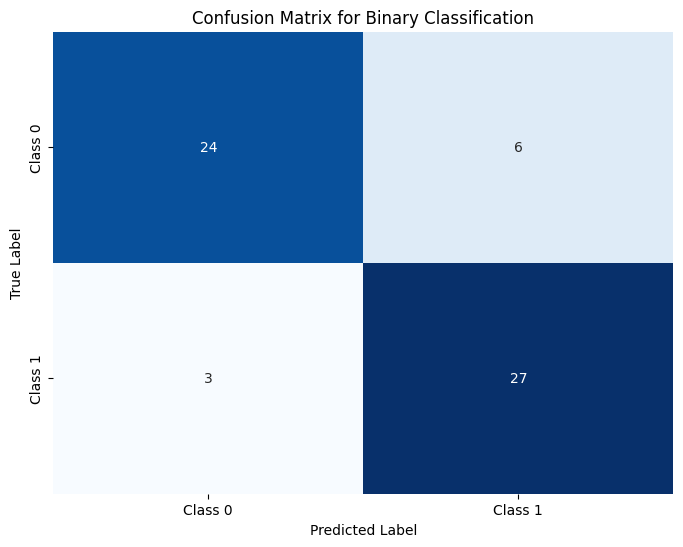


--- Interpretation of Confusion Matrix ---
The confusion matrix shows the number of correct and incorrect predictions:
  - Top-left (True Negative): 24 samples correctly predicted as Class 0.
  - Top-right (False Positive): 6 samples from Class 0 incorrectly predicted as Class 1 (Type I error).
  - Bottom-left (False Negative): 3 samples from Class 1 incorrectly predicted as Class 0 (Type II error).
  - Bottom-right (True Positive): 27 samples correctly predicted as Class 1.

This visualization helps understand the types of errors the model is making.

--- Logistic Regression with Confusion Matrix Visualization Example Complete ---


In [11]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced plotting, especially heatmaps
from sklearn.datasets import make_classification # To generate synthetic binary data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os # To check for file existence and create dummy data

# This function is retained from previous versions but not directly used in this specific example
# as we're generating synthetic binary data directly within the main function.
def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def perform_logistic_regression_and_evaluate():
    """
    Generates synthetic data for binary classification,
    trains a Logistic Regression model, and visualizes the confusion matrix.
    """
    print("--- Starting Logistic Regression with Confusion Matrix Visualization (Binary) ---")

    # 1. Generate Synthetic Binary Classification Dataset
    # n_samples: number of samples
    # n_features: number of features
    # n_informative: number of features that are actually informative
    # n_redundant: number of features that are linear combinations of informative features
    # n_classes: number of target classes (2 for binary)
    # weights: proportion of samples assigned to each class
    # random_state: for reproducibility
    X, y = make_classification(
        n_samples=200,
        n_features=4,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        weights=[0.5, 0.5], # Balanced classes
        random_state=42
    )

    # Convert to DataFrame for better readability
    X_df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
    y_series = pd.Series(y, name='target_class')

    print("Successfully generated synthetic binary classification dataset.")
    print(f"Features (X) shape: {X_df.shape}")
    print(f"Target (y) shape: {y_series.shape}\n")
    print(f"Target class distribution:\n{y_series.value_counts(normalize=True)}\n")


    # 2. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Initialize and Train the Logistic Regression Model
    # For binary classification, 'ovr' is not strictly necessary as 'auto' handles it,
    # but explicitly setting multi_class='ovr' or 'auto' (default) is fine.
    # solver='liblinear' is a good choice for smaller datasets and supports L1/L2.
    model = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')

    print("Training the Logistic Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Print the Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Model Performance ---")
    print(f"Model Accuracy on Test Set: {accuracy:.4f}")

    print("\n--- Additional Evaluation Metrics ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # 6. Visualize the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['Class 0', 'Class 1'] # Define class labels for clarity

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Binary Classification')
    plt.show()

    print("\n--- Interpretation of Confusion Matrix ---")
    print("The confusion matrix shows the number of correct and incorrect predictions:")
    print(f"  - Top-left (True Negative): {cm[0, 0]} samples correctly predicted as Class 0.")
    print(f"  - Top-right (False Positive): {cm[0, 1]} samples from Class 0 incorrectly predicted as Class 1 (Type I error).")
    print(f"  - Bottom-left (False Negative): {cm[1, 0]} samples from Class 1 incorrectly predicted as Class 0 (Type II error).")
    print(f"  - Bottom-right (True Positive): {cm[1, 1]} samples correctly predicted as Class 1.")
    print("\nThis visualization helps understand the types of errors the model is making.")

    print("\n--- Logistic Regression with Confusion Matrix Visualization Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression Evaluation with Precision, Recall, F1-Score ---
Successfully generated synthetic binary classification dataset.
Features (X) shape: (200, 4)
Target (y) shape: (200,)

Target class distribution:
target_class
1    0.505
0    0.495
Name: proportion, dtype: float64

Data split: Training samples = 140, Testing samples = 60

Training the Logistic Regression model...
Model training complete.

--- Model Performance Metrics ---
Model Accuracy on Test Set: 0.8500
Precision (for Class 1): 0.8182
Recall (for Class 1): 0.9000
F1-Score (for Class 1): 0.8571

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



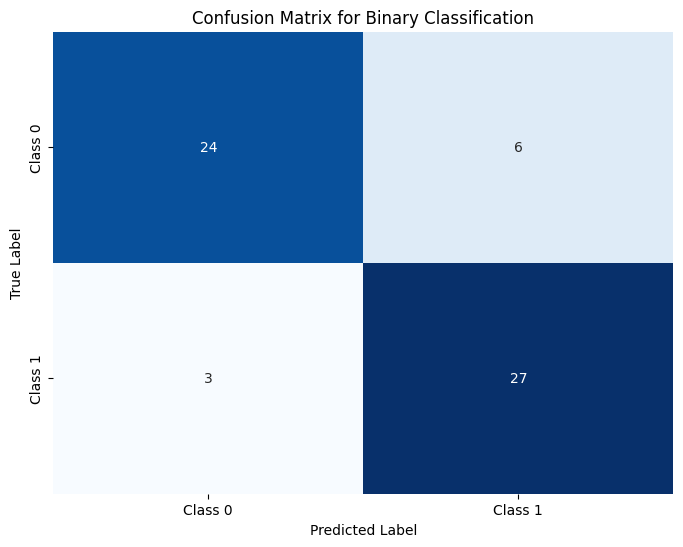


--- Interpretation of Metrics ---
**Accuracy (0.8500)**: The proportion of total predictions that were correct.

**Precision (for Class 1) ({precision:.4f})**: Out of all instances predicted as Class 1,
  what proportion actually belonged to Class 1. High precision means fewer False Positives.
  (i.e., when the model predicts 1, it's usually correct).

**Recall (for Class 1) ({recall:.4f})**: Out of all actual instances of Class 1,
  what proportion did the model correctly identify. High recall means fewer False Negatives.
  (i.e., the model finds most of the actual 1s).

**F1-Score (for Class 1) ({f1:.4f})**: The harmonic mean of Precision and Recall.
  It's a balanced metric that considers both False Positives and False Negatives.
  Useful when you need a balance between Precision and Recall.

**Confusion Matrix**: Provides a visual breakdown of correct and incorrect predictions for each class.
  - True Negative (Class 0 correctly predicted as 0): 24
  - False Positive (Class 0 inco

In [12]:
#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced plotting, especially heatmaps
from sklearn.datasets import make_classification # To generate synthetic binary data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import os # To check for file existence and create dummy data

# This function is retained from previous versions but not directly used in this specific example
# as we're generating synthetic binary data directly within the main function.
def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def perform_logistic_regression_and_evaluate():
    """
    Generates synthetic data for binary classification,
    trains a Logistic Regression model, and evaluates its performance
    using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix visualization.
    """
    print("--- Starting Logistic Regression Evaluation with Precision, Recall, F1-Score ---")

    # 1. Generate Synthetic Binary Classification Dataset
    X, y = make_classification(
        n_samples=200,
        n_features=4,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        weights=[0.5, 0.5], # Balanced classes
        random_state=42
    )

    # Convert to DataFrame for better readability
    X_df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
    y_series = pd.Series(y, name='target_class')

    print("Successfully generated synthetic binary classification dataset.")
    print(f"Features (X) shape: {X_df.shape}")
    print(f"Target (y) shape: {y_series.shape}\n")
    print(f"Target class distribution:\n{y_series.value_counts(normalize=True)}\n")


    # 2. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series # stratify ensures balanced classes in splits
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 3. Initialize and Train the Logistic Regression Model
    model = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')

    print("Training the Logistic Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 5. Calculate and Print Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    # Precision, Recall, F1-Score for binary classification (positive class is 1)
    # 'pos_label=1' explicitly sets the positive class.
    # 'average='binary'' computes metrics for the positive class only.
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print("--- Model Performance Metrics ---")
    print(f"Model Accuracy on Test Set: {accuracy:.4f}")
    print(f"Precision (for Class 1): {precision:.4f}")
    print(f"Recall (for Class 1): {recall:.4f}")
    print(f"F1-Score (for Class 1): {f1:.4f}")

    print("\n--- Detailed Classification Report ---")
    # Classification Report provides precision, recall, f1-score, and support for each class.
    print(classification_report(y_test, y_pred))

    # 6. Visualize the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['Class 0', 'Class 1'] # Define class labels for clarity

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Binary Classification')
    plt.show()

    print("\n--- Interpretation of Metrics ---")
    print(f"**Accuracy ({accuracy:.4f})**: The proportion of total predictions that were correct.")
    print("\n**Precision (for Class 1) ({precision:.4f})**: Out of all instances predicted as Class 1,")
    print("  what proportion actually belonged to Class 1. High precision means fewer False Positives.")
    print("  (i.e., when the model predicts 1, it's usually correct).")
    print("\n**Recall (for Class 1) ({recall:.4f})**: Out of all actual instances of Class 1,")
    print("  what proportion did the model correctly identify. High recall means fewer False Negatives.")
    print("  (i.e., the model finds most of the actual 1s).")
    print("\n**F1-Score (for Class 1) ({f1:.4f})**: The harmonic mean of Precision and Recall.")
    print("  It's a balanced metric that considers both False Positives and False Negatives.")
    print("  Useful when you need a balance between Precision and Recall.")
    print("\n**Confusion Matrix**: Provides a visual breakdown of correct and incorrect predictions for each class.")
    print(f"  - True Negative (Class 0 correctly predicted as 0): {cm[0, 0]}")
    print(f"  - False Positive (Class 0 incorrectly predicted as 1): {cm[0, 1]}")
    print(f"  - False Negative (Class 1 incorrectly predicted as 0): {cm[1, 0]}")
    print(f"  - True Positive (Class 1 correctly predicted as 1): {cm[1, 1]}")

    print("\n--- Logistic Regression Evaluation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression on Imbalanced Data with Class Weights ---
Successfully generated synthetic imbalanced binary classification dataset.
Features (X) shape: (500, 4)
Target (y) shape: (500,)

Target class distribution:
target_class
0    450
1     50
Name: count, dtype: int64
Minority class (Class 1) count: 50
Majority class (Class 0) count: 450

Data split: Training samples = 350, Testing samples = 150
Training set class distribution:
target_class
0    0.9
1    0.1
Name: proportion, dtype: float64
Test set class distribution:
target_class
0    0.9
1    0.1
Name: proportion, dtype: float64


--- Training Logistic Regression WITHOUT Class Weights ---
Model WITHOUT Class Weights Performance:
Accuracy: 0.9333
Precision (Class 1): 0.6923
Recall (Class 1): 0.6000
F1-Score (Class 1): 0.6429

Classification Report (No Weights):
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.96       135
     Class 1       0.69      0.60      0.64   

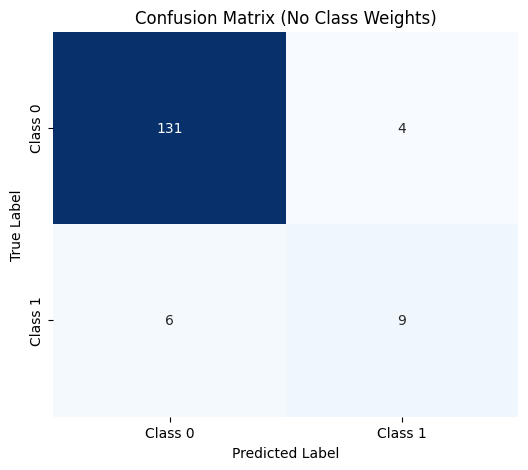


--- Training Logistic Regression WITH Class Weights ('balanced') ---
Model WITH Class Weights Performance:
Accuracy: 0.8667
Precision (Class 1): 0.4194
Recall (Class 1): 0.8667
F1-Score (Class 1): 0.5652

Classification Report (With Weights):
              precision    recall  f1-score   support

     Class 0       0.98      0.87      0.92       135
     Class 1       0.42      0.87      0.57        15

    accuracy                           0.87       150
   macro avg       0.70      0.87      0.74       150
weighted avg       0.93      0.87      0.89       150



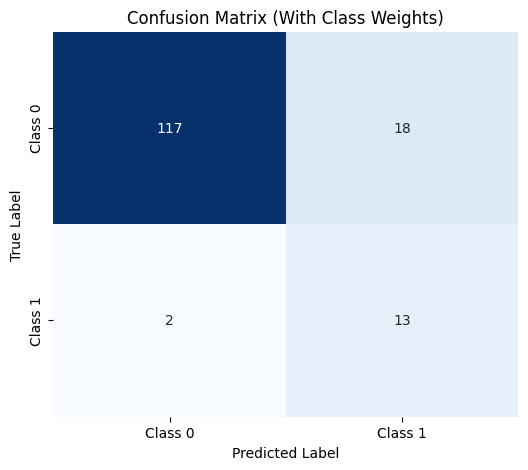


--- Comparison and Interpretation ---
When dealing with imbalanced datasets, a model might achieve high overall accuracy
by simply predicting the majority class most of the time. However, this often leads
to poor performance (low recall and F1-score) for the minority class, which is usually
the class of interest (e.g., fraud, disease).

**Observation without class weights:**
  - You might notice a high accuracy, but a very low recall for Class 1 (the minority class).
  - The confusion matrix will likely show many False Negatives for Class 1.

**Observation with class weights:**
  - The overall accuracy might slightly decrease, but the recall for Class 1 should significantly improve.
  - The F1-score for Class 1 should also improve, indicating a better balance between precision and recall.
  - The confusion matrix will show fewer False Negatives for Class 1, at the possible cost of more False Positives for Class 0.

`class_weight='balanced'` automatically assigns weights to classes inv

In [13]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced plotting, especially heatmaps
from sklearn.datasets import make_classification # To generate synthetic imbalanced data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os # To check for file existence and create dummy data

# This function is retained from previous versions but not directly used in this specific example
# as we're generating synthetic binary data directly within the main function.
def create_synthetic_csv(filename="synthetic_classification_data.csv", num_samples=200):
    """
    Creates a synthetic CSV file for binary classification if it doesn't exist.
    Features: feature_1, feature_2, feature_3
    Target: target (0 or 1)
    """
    if os.path.exists(filename):
        print(f"Skipping CSV creation: '{filename}' already exists.")
        return

    print(f"Creating synthetic CSV file: '{filename}' with {num_samples} samples...")
    np.random.seed(42) # for reproducibility

    # Generate features
    feature_1 = np.random.rand(num_samples) * 10
    feature_2 = np.random.rand(num_samples) * 5
    feature_3 = np.random.rand(num_samples) * 2

    # Generate a binary target based on a linear combination of features + noise
    linear_combination = 0.5 * feature_1 - 0.8 * feature_2 + 1.2 * feature_3 + np.random.randn(num_samples) * 1.5
    target = (linear_combination > np.median(linear_combination)).astype(int) # Binary target

    data = pd.DataFrame({
        'feature_1': feature_1,
        'feature_2': feature_2,
        'feature_3': feature_3,
        'target': target
    })

    data.to_csv(filename, index=False)
    print(f"Synthetic CSV '{filename}' created successfully.\n")


def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


def perform_logistic_regression_and_evaluate():
    """
    Generates synthetic imbalanced data for binary classification,
    trains Logistic Regression models with and without class weights,
    and evaluates their performance using various metrics and confusion matrices.
    """
    print("--- Starting Logistic Regression on Imbalanced Data with Class Weights ---")

    # 1. Generate Synthetic Imbalanced Binary Classification Dataset
    # We'll create a dataset where one class is significantly less frequent (minority class).
    X, y = make_classification(
        n_samples=500,        # Total number of samples
        n_features=4,         # Number of features
        n_informative=2,      # Number of informative features
        n_redundant=0,        # Number of redundant features
        n_classes=2,          # Number of target classes (binary classification)
        weights=[0.9, 0.1],   # Class distribution: 90% for class 0, 10% for class 1
        random_state=42,      # For reproducibility
        flip_y=0              # No noise in labels
    )

    # Convert to DataFrame for better readability
    X_df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
    y_series = pd.Series(y, name='target_class')

    print("Successfully generated synthetic imbalanced binary classification dataset.")
    print(f"Features (X) shape: {X_df.shape}")
    print(f"Target (y) shape: {y_series.shape}\n")
    print(f"Target class distribution:\n{y_series.value_counts(normalize=False)}")
    print(f"Minority class (Class 1) count: {y_series.value_counts()[1]}")
    print(f"Majority class (Class 0) count: {y_series.value_counts()[0]}\n")


    # 2. Split the Dataset into Training and Testing Sets
    # stratify=y_series is crucial here to ensure both train and test sets
    # maintain the same imbalanced class distribution.
    X_train, X_test, y_train, y_test = train_test_split(
        X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}")
    print(f"Training set class distribution:\n{y_train.value_counts(normalize=True)}")
    print(f"Test set class distribution:\n{y_test.value_counts(normalize=True)}\n")

    # --- Model 1: Logistic Regression WITHOUT Class Weights ---
    print("\n--- Training Logistic Regression WITHOUT Class Weights ---")
    model_no_weights = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')
    model_no_weights.fit(X_train, y_train)
    y_pred_no_weights = model_no_weights.predict(X_test)

    print("Model WITHOUT Class Weights Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_no_weights):.4f}")
    print(f"Precision (Class 1): {precision_score(y_test, y_pred_no_weights, pos_label=1):.4f}")
    print(f"Recall (Class 1): {recall_score(y_test, y_pred_no_weights, pos_label=1):.4f}")
    print(f"F1-Score (Class 1): {f1_score(y_test, y_pred_no_weights, pos_label=1):.4f}")
    print("\nClassification Report (No Weights):")
    print(classification_report(y_test, y_pred_no_weights, target_names=['Class 0', 'Class 1']))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred_no_weights), ['Class 0', 'Class 1'],
                          'Confusion Matrix (No Class Weights)')

    # --- Model 2: Logistic Regression WITH Class Weights ---
    print("\n--- Training Logistic Regression WITH Class Weights ('balanced') ---")
    # class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies.
    # This gives more importance to the minority class during training.
    model_with_weights = LogisticRegression(random_state=42, max_iter=200, solver='liblinear', class_weight='balanced')
    model_with_weights.fit(X_train, y_train)
    y_pred_with_weights = model_with_weights.predict(X_test)

    print("Model WITH Class Weights Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_with_weights):.4f}")
    print(f"Precision (Class 1): {precision_score(y_test, y_pred_with_weights, pos_label=1):.4f}")
    print(f"Recall (Class 1): {recall_score(y_test, y_pred_with_weights, pos_label=1):.4f}")
    print(f"F1-Score (Class 1): {f1_score(y_test, y_pred_with_weights, pos_label=1):.4f}")
    print("\nClassification Report (With Weights):")
    print(classification_report(y_test, y_pred_with_weights, target_names=['Class 0', 'Class 1']))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred_with_weights), ['Class 0', 'Class 1'],
                          'Confusion Matrix (With Class Weights)')

    print("\n--- Comparison and Interpretation ---")
    print("When dealing with imbalanced datasets, a model might achieve high overall accuracy")
    print("by simply predicting the majority class most of the time. However, this often leads")
    print("to poor performance (low recall and F1-score) for the minority class, which is usually")
    print("the class of interest (e.g., fraud, disease).")
    print("\n**Observation without class weights:**")
    print("  - You might notice a high accuracy, but a very low recall for Class 1 (the minority class).")
    print("  - The confusion matrix will likely show many False Negatives for Class 1.")
    print("\n**Observation with class weights:**")
    print("  - The overall accuracy might slightly decrease, but the recall for Class 1 should significantly improve.")
    print("  - The F1-score for Class 1 should also improve, indicating a better balance between precision and recall.")
    print("  - The confusion matrix will show fewer False Negatives for Class 1, at the possible cost of more False Positives for Class 0.")
    print("\n`class_weight='balanced'` automatically assigns weights to classes inversely proportional to their frequencies.")
    print("This makes the model pay more attention to correctly classifying the minority class,")
    print("even if it means making more errors on the majority class.")

    print("\n--- Logistic Regression on Imbalanced Data Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_and_evaluate()


--- Starting Logistic Regression on Titanic Dataset ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: (891,)

Missing val

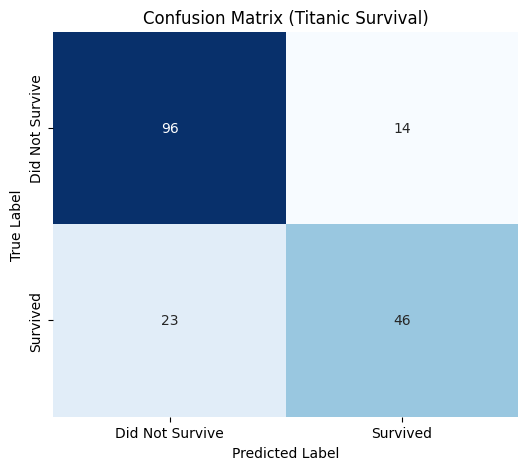


--- Interpretation ---
The model achieved an accuracy of 0.79 on the test set.
The precision, recall, and F1-score provide a more nuanced view, especially for the 'Survived' class.
The confusion matrix visually breaks down correct and incorrect predictions.

Missing values in 'Age' and 'Embarked' were imputed, and categorical features were one-hot encoded
as part of the preprocessing pipeline before training the Logistic Regression model.

--- Logistic Regression on Titanic Dataset Complete ---


In [14]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder # For one-hot encoding categorical features
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression, and evaluates its performance.
    """
    print("--- Starting Logistic Regression on Titanic Dataset ---")

    # 1. Load the Titanic Dataset
    try:
        # Load the Titanic dataset from seaborn
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    # Our target variable is 'survived' (0 = No, 1 = Yes)
    # Features we'll consider: 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'
    # 'cabin' has too many missing values and will be dropped.
    # 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone' are derived or redundant for this example.
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps using ColumnTransformer and Pipeline
    # Identify numerical and categorical columns for different preprocessing
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Preprocessing for numerical features: impute missing 'age' with median
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    # Preprocessing for categorical features: impute missing 'embarked' with most frequent, then one-hot encode
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' prevents errors for new categories
    ])

    # Create a preprocessor using ColumnTransformer
    # It applies different transformers to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # 4. Create the Machine Learning Pipeline
    # This pipeline first applies the preprocessing steps and then fits the Logistic Regression model.
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
    ])

    print("Preprocessing and Model Pipeline created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    # stratify=y is important for classification to maintain class balance in splits.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline (which includes preprocessing and model fitting)
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Make Predictions on the Test Set
    y_pred = model_pipeline.predict(X_test)

    # 8. Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1) # Assuming 1 is the positive class (survived)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Survived): {precision:.4f}")
    print(f"Recall (Survived): {recall:.4f}")
    print(f"F1-Score (Survived): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

    plot_confusion_matrix(cm, ['Did Not Survive', 'Survived'], 'Confusion Matrix (Titanic Survival)')

    print("\n--- Interpretation ---")
    print(f"The model achieved an accuracy of {accuracy:.2f} on the test set.")
    print("The precision, recall, and F1-score provide a more nuanced view, especially for the 'Survived' class.")
    print("The confusion matrix visually breaks down correct and incorrect predictions.")
    print("\nMissing values in 'Age' and 'Embarked' were imputed, and categorical features were one-hot encoded")
    print("as part of the preprocessing pipeline before training the Logistic Regression model.")

    print("\n--- Logistic Regression on Titanic Dataset Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression on Titanic Dataset with/without Scaling ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape

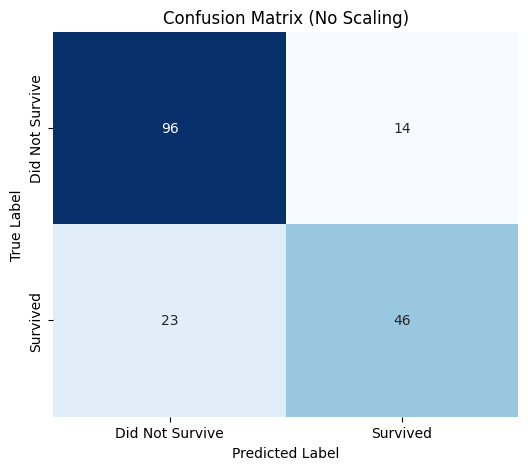


--- Training and Evaluating Model WITH Scaling ---
Accuracy (With Scaling): 0.8045
Precision (Survived, With Scaling): 0.7931
Recall (Survived, With Scaling): 0.6667
F1-Score (Survived, With Scaling): 0.7244

Classification Report (With Scaling):
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.89      0.85       110
       Survived       0.79      0.67      0.72        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



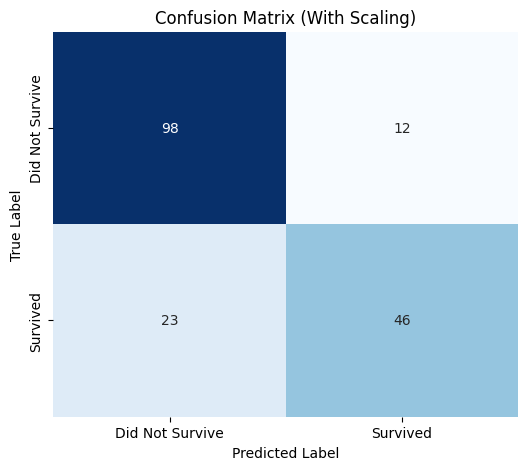


--- Comparison of Results ---
Accuracy (No Scaling): 0.7933 | Accuracy (With Scaling): 0.8045
Precision (No Scaling): 0.7667 | Precision (With Scaling): 0.7931
Recall (No Scaling): 0.6667 | Recall (With Scaling): 0.6667
F1-Score (No Scaling): 0.7132 | F1-Score (With Scaling): 0.7244

--- Interpretation ---
Logistic Regression, being a linear model, can sometimes be sensitive to the scale of features.
Features with larger ranges can dominate the cost function, leading to suboptimal coefficient updates.
Standardization (scaling features to have zero mean and unit variance) helps to bring all features
to a comparable scale, which can lead to faster convergence during training and potentially better performance.

In this specific case, observe if scaling led to a significant change in accuracy, precision, recall, or F1-score.
Often, models like Logistic Regression, SVMs, and Neural Networks benefit more from scaling than tree-based models.

--- Logistic Regression with/without Feature Sca

In [15]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression with and without feature scaling,
    and evaluates and compares their performance.
    """
    print("--- Starting Logistic Regression on Titanic Dataset with/without Scaling ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Base numerical transformer (imputation only)
    numerical_imputer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    # Categorical transformer (imputation + one-hot encoding)
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer for common steps
    # This preprocessor will be used in both scaled and unscaled pipelines
    common_preprocessor = ColumnTransformer(
        transformers=[
            ('num_impute', numerical_imputer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough' # Keep other columns if any, though not relevant here
    )

    # 4. Create Machine Learning Pipelines
    # --- Pipeline 1: Without Feature Scaling ---
    # The preprocessor handles imputation and one-hot encoding.
    # Numerical features will retain their original scale after imputation.
    pipeline_no_scaling = Pipeline(steps=[
        ('preprocessor', common_preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
    ])
    print("Pipeline without explicit feature scaling created.\n")

    # --- Pipeline 2: With Feature Scaling (Standardization) ---
    # A StandardScaler is added after the common preprocessor to scale numerical features.
    # Note: StandardScaler will operate on ALL numerical features *after* imputation
    # and also on the one-hot encoded features (which are 0s and 1s).
    # While scaling 0/1 features isn't strictly necessary, it's often done
    # when using a single scaler for all numerical-like outputs from preprocessing.
    pipeline_with_scaling = Pipeline(steps=[
        ('preprocessor', common_preprocessor),
        ('scaler', StandardScaler()), # Add StandardScaler here
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
    ])
    print("Pipeline with StandardScaler created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train and Evaluate Pipeline WITHOUT Scaling
    print("--- Training and Evaluating Model WITHOUT Scaling ---")
    pipeline_no_scaling.fit(X_train, y_train)
    y_pred_no_scaling = pipeline_no_scaling.predict(X_test)

    accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
    precision_no_scaling = precision_score(y_test, y_pred_no_scaling, pos_label=1)
    recall_no_scaling = recall_score(y_test, y_pred_no_scaling, pos_label=1)
    f1_no_scaling = f1_score(y_test, y_pred_no_scaling, pos_label=1)
    cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

    print(f"Accuracy (No Scaling): {accuracy_no_scaling:.4f}")
    print(f"Precision (Survived, No Scaling): {precision_no_scaling:.4f}")
    print(f"Recall (Survived, No Scaling): {recall_no_scaling:.4f}")
    print(f"F1-Score (Survived, No Scaling): {f1_no_scaling:.4f}")
    print("\nClassification Report (No Scaling):")
    print(classification_report(y_test, y_pred_no_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_no_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (No Scaling)')

    # 7. Train and Evaluate Pipeline WITH Scaling
    print("\n--- Training and Evaluating Model WITH Scaling ---")
    pipeline_with_scaling.fit(X_train, y_train)
    y_pred_with_scaling = pipeline_with_scaling.predict(X_test)

    accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
    precision_with_scaling = precision_score(y_test, y_pred_with_scaling, pos_label=1)
    recall_with_scaling = recall_score(y_test, y_pred_with_scaling, pos_label=1)
    f1_with_scaling = f1_score(y_test, y_pred_with_scaling, pos_label=1)
    cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)

    print(f"Accuracy (With Scaling): {accuracy_with_scaling:.4f}")
    print(f"Precision (Survived, With Scaling): {precision_with_scaling:.4f}")
    print(f"Recall (Survived, With Scaling): {recall_with_scaling:.4f}")
    print(f"F1-Score (Survived, With Scaling): {f1_with_scaling:.4f}")
    print("\nClassification Report (With Scaling):")
    print(classification_report(y_test, y_pred_with_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_with_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (With Scaling)')

    print("\n--- Comparison of Results ---")
    print(f"Accuracy (No Scaling): {accuracy_no_scaling:.4f} | Accuracy (With Scaling): {accuracy_with_scaling:.4f}")
    print(f"Precision (No Scaling): {precision_no_scaling:.4f} | Precision (With Scaling): {precision_with_scaling:.4f}")
    print(f"Recall (No Scaling): {recall_no_scaling:.4f} | Recall (With Scaling): {recall_with_scaling:.4f}")
    print(f"F1-Score (No Scaling): {f1_no_scaling:.4f} | F1-Score (With Scaling): {f1_with_scaling:.4f}")

    print("\n--- Interpretation ---")
    print("Logistic Regression, being a linear model, can sometimes be sensitive to the scale of features.")
    print("Features with larger ranges can dominate the cost function, leading to suboptimal coefficient updates.")
    print("Standardization (scaling features to have zero mean and unit variance) helps to bring all features")
    print("to a comparable scale, which can lead to faster convergence during training and potentially better performance.")
    print("\nIn this specific case, observe if scaling led to a significant change in accuracy, precision, recall, or F1-score.")
    print("Often, models like Logistic Regression, SVMs, and Neural Networks benefit more from scaling than tree-based models.")

    print("\n--- Logistic Regression with/without Feature Scaling Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression on Titanic Dataset with/without Scaling ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape

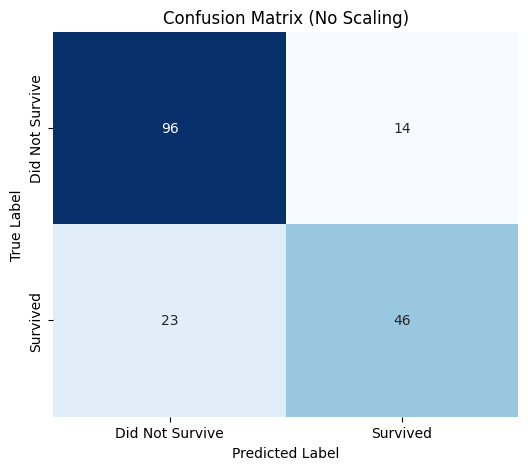

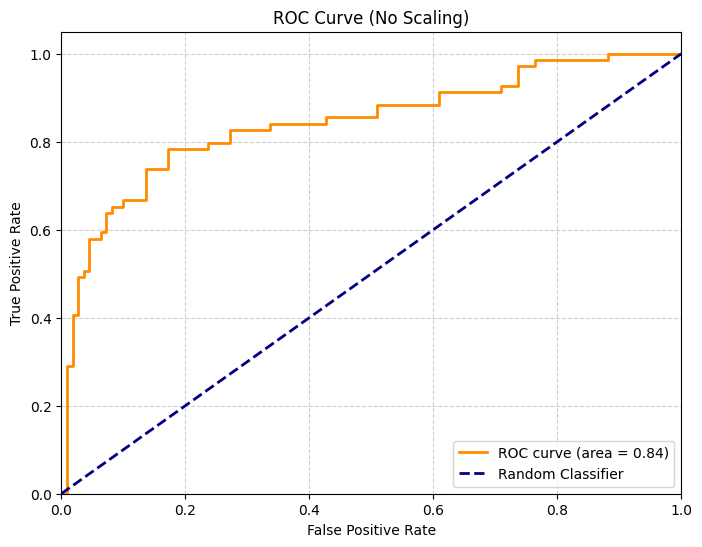


--- Training and Evaluating Model WITH Scaling ---
Accuracy (With Scaling): 0.8045
Precision (Survived, With Scaling): 0.7931
Recall (Survived, With Scaling): 0.6667
F1-Score (Survived, With Scaling): 0.7244
ROC-AUC Score (With Scaling): 0.8430

Classification Report (With Scaling):
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.89      0.85       110
       Survived       0.79      0.67      0.72        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



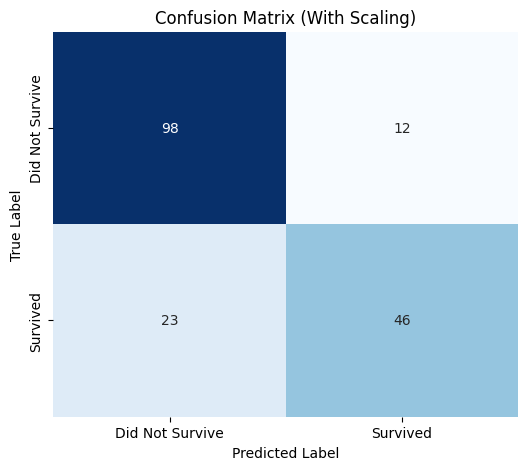

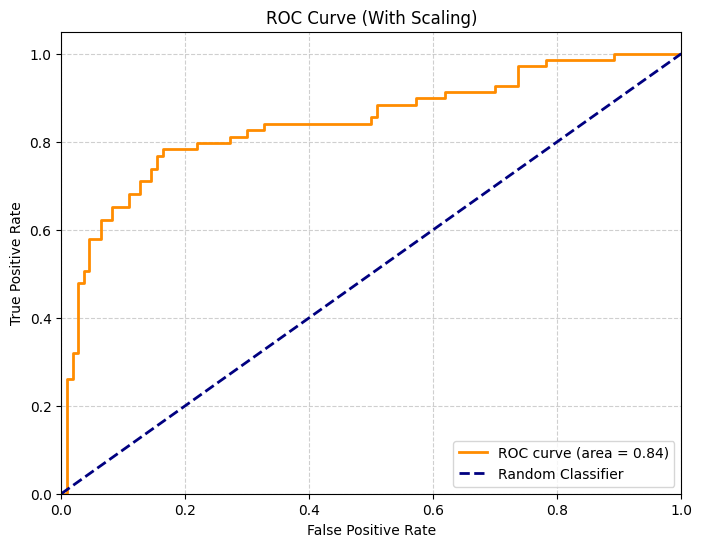


--- Comparison of Results ---
Accuracy (No Scaling): 0.7933 | Accuracy (With Scaling): 0.8045
Precision (No Scaling): 0.7667 | Precision (With Scaling): 0.7931
Recall (No Scaling): 0.6667 | Recall (With Scaling): 0.6667
F1-Score (No Scaling): 0.7132 | F1-Score (With Scaling): 0.7244
ROC-AUC (No Scaling): 0.8440 | ROC-AUC (With Scaling): 0.8430

--- Interpretation ---
ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a performance metric for binary classifiers.
It represents the ability of the model to distinguish between classes. An AUC of 1.0 means perfect classification,
while an AUC of 0.5 means the model performs no better than random guessing.
A higher ROC-AUC score indicates a better performing model.
The ROC curve itself plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity)
at various threshold settings. A curve that bows towards the top-left corner indicates better performance.

In this specific case, observe if scalin

In [16]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression with and without feature scaling,
    and evaluates and compares their performance using Accuracy, Precision, Recall, F1-Score,
    Confusion Matrix, and ROC-AUC score with visualization.
    """
    print("--- Starting Logistic Regression on Titanic Dataset with/without Scaling ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Base numerical transformer (imputation only)
    numerical_imputer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    # Categorical transformer (imputation + one-hot encoding)
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer for common steps
    common_preprocessor = ColumnTransformer(
        transformers=[
            ('num_impute', numerical_imputer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Create Machine Learning Pipelines
    # --- Pipeline 1: Without Feature Scaling ---
    pipeline_no_scaling = Pipeline(steps=[
        ('preprocessor', common_preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
    ])
    print("Pipeline without explicit feature scaling created.\n")

    # --- Pipeline 2: With Feature Scaling (Standardization) ---
    pipeline_with_scaling = Pipeline(steps=[
        ('preprocessor', common_preprocessor),
        ('scaler', StandardScaler()), # Add StandardScaler here
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
    ])
    print("Pipeline with StandardScaler created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train and Evaluate Pipeline WITHOUT Scaling
    print("--- Training and Evaluating Model WITHOUT Scaling ---")
    pipeline_no_scaling.fit(X_train, y_train)
    y_pred_no_scaling = pipeline_no_scaling.predict(X_test)
    # Get probabilities for ROC curve
    y_proba_no_scaling = pipeline_no_scaling.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
    precision_no_scaling = precision_score(y_test, y_pred_no_scaling, pos_label=1)
    recall_no_scaling = recall_score(y_test, y_pred_no_scaling, pos_label=1)
    f1_no_scaling = f1_score(y_test, y_pred_no_scaling, pos_label=1)
    cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
    fpr_no_scaling, tpr_no_scaling, _ = roc_curve(y_test, y_proba_no_scaling)
    roc_auc_no_scaling = auc(fpr_no_scaling, tpr_no_scaling)

    print(f"Accuracy (No Scaling): {accuracy_no_scaling:.4f}")
    print(f"Precision (Survived, No Scaling): {precision_no_scaling:.4f}")
    print(f"Recall (Survived, No Scaling): {recall_no_scaling:.4f}")
    print(f"F1-Score (Survived, No Scaling): {f1_no_scaling:.4f}")
    print(f"ROC-AUC Score (No Scaling): {roc_auc_no_scaling:.4f}")
    print("\nClassification Report (No Scaling):")
    print(classification_report(y_test, y_pred_no_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_no_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (No Scaling)')
    plot_roc_curve(fpr_no_scaling, tpr_no_scaling, roc_auc_no_scaling, 'ROC Curve (No Scaling)')


    # 7. Train and Evaluate Pipeline WITH Scaling
    print("\n--- Training and Evaluating Model WITH Scaling ---")
    pipeline_with_scaling.fit(X_train, y_train)
    y_pred_with_scaling = pipeline_with_scaling.predict(X_test)
    # Get probabilities for ROC curve
    y_proba_with_scaling = pipeline_with_scaling.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
    precision_with_scaling = precision_score(y_test, y_pred_with_scaling, pos_label=1)
    recall_with_scaling = recall_score(y_test, y_pred_with_scaling, pos_label=1)
    f1_with_scaling = f1_score(y_test, y_pred_with_scaling, pos_label=1)
    cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
    fpr_with_scaling, tpr_with_scaling, _ = roc_curve(y_test, y_proba_with_scaling)
    roc_auc_with_scaling = auc(fpr_with_scaling, tpr_with_scaling)

    print(f"Accuracy (With Scaling): {accuracy_with_scaling:.4f}")
    print(f"Precision (Survived, With Scaling): {precision_with_scaling:.4f}")
    print(f"Recall (Survived, With Scaling): {recall_with_scaling:.4f}")
    print(f"F1-Score (Survived, With Scaling): {f1_with_scaling:.4f}")
    print(f"ROC-AUC Score (With Scaling): {roc_auc_with_scaling:.4f}")
    print("\nClassification Report (With Scaling):")
    print(classification_report(y_test, y_pred_with_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_with_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (With Scaling)')
    plot_roc_curve(fpr_with_scaling, tpr_with_scaling, roc_auc_with_scaling, 'ROC Curve (With Scaling)')

    print("\n--- Comparison of Results ---")
    print(f"Accuracy (No Scaling): {accuracy_no_scaling:.4f} | Accuracy (With Scaling): {accuracy_with_scaling:.4f}")
    print(f"Precision (No Scaling): {precision_no_scaling:.4f} | Precision (With Scaling): {precision_with_scaling:.4f}")
    print(f"Recall (No Scaling): {recall_no_scaling:.4f} | Recall (With Scaling): {recall_with_scaling:.4f}")
    print(f"F1-Score (No Scaling): {f1_no_scaling:.4f} | F1-Score (With Scaling): {f1_with_scaling:.4f}")
    print(f"ROC-AUC (No Scaling): {roc_auc_no_scaling:.4f} | ROC-AUC (With Scaling): {roc_auc_with_scaling:.4f}")

    print("\n--- Interpretation ---")
    print("ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a performance metric for binary classifiers.")
    print("It represents the ability of the model to distinguish between classes. An AUC of 1.0 means perfect classification,")
    print("while an AUC of 0.5 means the model performs no better than random guessing.")
    print("A higher ROC-AUC score indicates a better performing model.")
    print("The ROC curve itself plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity)")
    print("at various threshold settings. A curve that bows towards the top-left corner indicates better performance.")
    print("\nIn this specific case, observe if scaling led to a significant change in ROC-AUC or other metrics.")

    print("\n--- Logistic Regression with ROC-AUC Evaluation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression on Titanic Dataset with Custom C ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: (891,

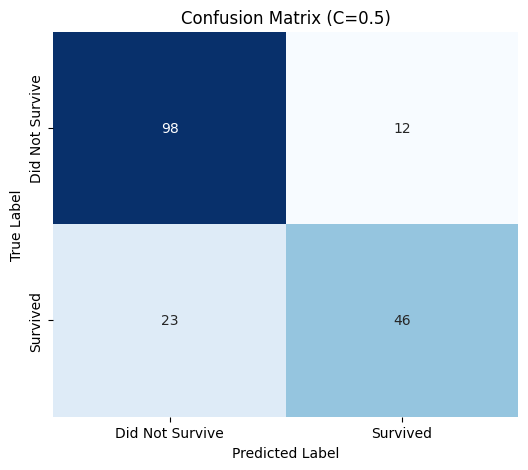

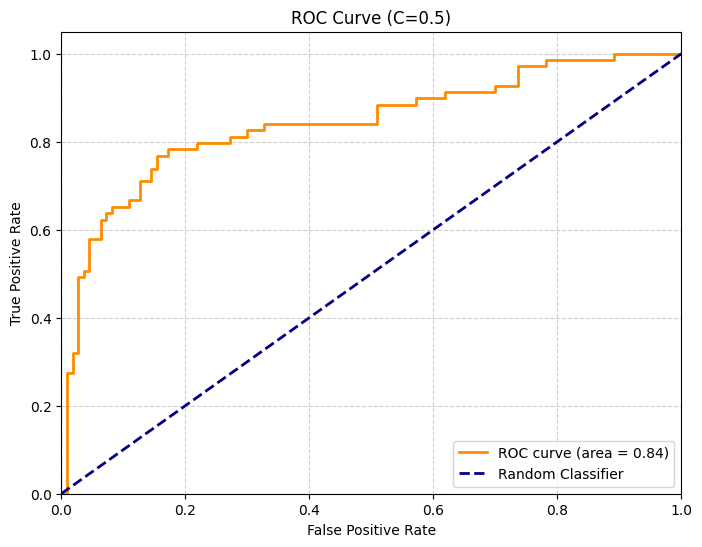


--- Interpretation of C Parameter ---
In scikit-learn's Logistic Regression, 'C' is the inverse of the regularization strength.
  - A **smaller** value of C (like 0.5) means **stronger** regularization.
  - A **larger** value of C (e.g., 100) means **weaker** regularization.
Regularization helps prevent overfitting by penalizing large coefficients.
It is distinct from a 'learning rate', which is a hyperparameter for optimization algorithms
that controls the step size at each iteration while moving towards a minimum of a loss function.
For `LogisticRegression`, the learning rate is handled internally by the chosen `solver` (e.g., 'liblinear', 'lbfgs').

--- Logistic Regression with Custom C Example Complete ---


In [17]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression with a custom C (regularization strength),
    and evaluates its performance using Accuracy, Precision, Recall, F1-Score,
    Confusion Matrix, and ROC-AUC score with visualization.
    """
    print("--- Starting Logistic Regression on Titanic Dataset with Custom C ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Base numerical transformer (imputation only)
    numerical_imputer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    # Categorical transformer (imputation + one-hot encoding)
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer for common steps
    common_preprocessor = ColumnTransformer(
        transformers=[
            ('num_impute', numerical_imputer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Create Machine Learning Pipeline with StandardScaler and Custom C
    # Here, we set C=0.5 as requested.
    # C is the inverse of regularization strength. A smaller C means stronger regularization.
    # This helps prevent overfitting by penalizing large coefficients.
    pipeline_with_custom_c = Pipeline(steps=[
        ('preprocessor', common_preprocessor),
        ('scaler', StandardScaler()), # It's good practice to scale features for Logistic Regression
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.5))
    ])
    print("Pipeline with StandardScaler and custom C=0.5 created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train and Evaluate Pipeline with Custom C
    print("--- Training and Evaluating Model with Custom C=0.5 ---")
    pipeline_with_custom_c.fit(X_train, y_train)
    y_pred_custom_c = pipeline_with_custom_c.predict(X_test)
    y_proba_custom_c = pipeline_with_custom_c.predict_proba(X_test)[:, 1]

    accuracy_custom_c = accuracy_score(y_test, y_pred_custom_c)
    precision_custom_c = precision_score(y_test, y_pred_custom_c, pos_label=1)
    recall_custom_c = recall_score(y_test, y_pred_custom_c, pos_label=1)
    f1_custom_c = f1_score(y_test, y_pred_custom_c, pos_label=1)
    cm_custom_c = confusion_matrix(y_test, y_pred_custom_c)
    fpr_custom_c, tpr_custom_c, _ = roc_curve(y_test, y_proba_custom_c)
    roc_auc_custom_c = auc(fpr_custom_c, tpr_custom_c)

    print(f"Accuracy (C=0.5): {accuracy_custom_c:.4f}")
    print(f"Precision (Survived, C=0.5): {precision_custom_c:.4f}")
    print(f"Recall (Survived, C=0.5): {recall_custom_c:.4f}")
    print(f"F1-Score (Survived, C=0.5): {f1_custom_c:.4f}")
    print(f"ROC-AUC Score (C=0.5): {roc_auc_custom_c:.4f}")
    print("\nClassification Report (C=0.5):")
    print(classification_report(y_test, y_pred_custom_c, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_custom_c, ['Did Not Survive', 'Survived'], 'Confusion Matrix (C=0.5)')
    plot_roc_curve(fpr_custom_c, tpr_custom_c, roc_auc_custom_c, 'ROC Curve (C=0.5)')

    print("\n--- Interpretation of C Parameter ---")
    print("In scikit-learn's Logistic Regression, 'C' is the inverse of the regularization strength.")
    print("  - A **smaller** value of C (like 0.5) means **stronger** regularization.")
    print("  - A **larger** value of C (e.g., 100) means **weaker** regularization.")
    print("Regularization helps prevent overfitting by penalizing large coefficients.")
    print("It is distinct from a 'learning rate', which is a hyperparameter for optimization algorithms")
    print("that controls the step size at each iteration while moving towards a minimum of a loss function.")
    print("For `LogisticRegression`, the learning rate is handled internally by the chosen `solver` (e.g., 'liblinear', 'lbfgs').")

    print("\n--- Logistic Regression with Custom C Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression: Feature Importance from Coefficients ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: 

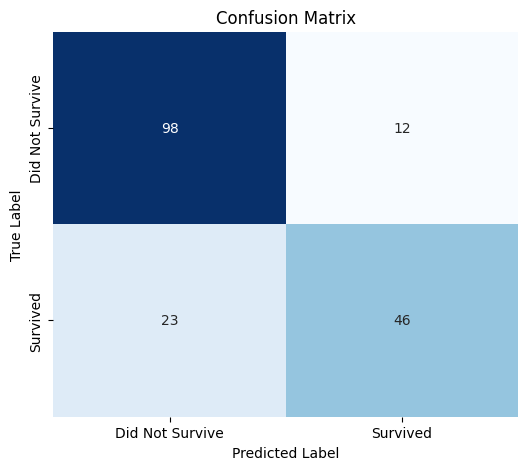

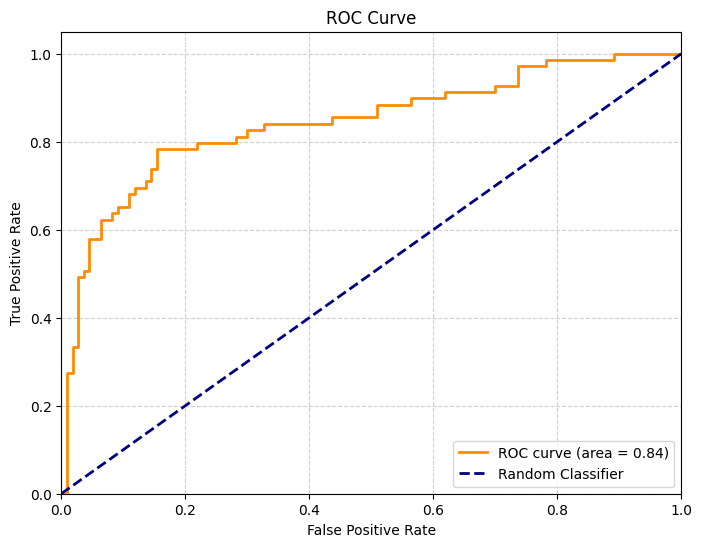


--- Identifying Important Features from Model Coefficients ---
Features sorted by absolute coefficient magnitude (most important first):
        Feature  Coefficient
  cat__sex_male    -1.295474
cat__sex_female     1.260659
    num__pclass    -0.895677
       num__age    -0.488843
cat__embarked_S    -0.348029
cat__embarked_Q     0.276018
     num__sibsp    -0.253219
      num__fare     0.108032
     num__parch    -0.062262
cat__embarked_C     0.037195

--- Interpretation of Coefficients as Feature Importance ---
For Logistic Regression, the magnitude of a coefficient indicates the strength of the relationship
between that feature and the log-odds of the target variable (survival in this case).
A larger absolute coefficient implies a stronger influence.
The sign of the coefficient indicates the direction of the relationship:
  - Positive coefficient: Increases the log-odds (and thus probability) of survival.
  - Negative coefficient: Decreases the log-odds (and thus probability) of sur

In [18]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression, evaluates its performance,
    and identifies important features based on model coefficients.
    """
    print("--- Starting Logistic Regression: Feature Importance from Coefficients ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Numerical transformer: impute missing values with median, then standardize
    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    # Categorical transformer: impute missing values with most frequent, then one-hot encode
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough' # Keep any other columns not specified (though none here)
    )

    # 4. Create Machine Learning Pipeline
    # The pipeline applies preprocessing and then fits the Logistic Regression model.
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.5))
    ])
    print("Preprocessing and Model Pipeline created (with StandardScaler and C=0.5).\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Make Predictions and Evaluate Model Performance
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Survived): {precision:.4f}")
    print(f"Recall (Survived): {recall:.4f}")
    print(f"F1-Score (Survived): {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm, ['Did Not Survive', 'Survived'], 'Confusion Matrix')
    plot_roc_curve(fpr, tpr, roc_auc, 'ROC Curve')

    # 8. Identify Important Features from Coefficients
    print("\n--- Identifying Important Features from Model Coefficients ---")

    # Get the trained classifier from the pipeline
    classifier = model_pipeline.named_steps['classifier']
    coefficients = classifier.coef_[0] # For binary classification, coef_ is 2D (1, n_features), so take [0]

    # Get the names of the transformed features from the preprocessor
    # This includes scaled numerical features and one-hot encoded categorical features.
    transformed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Create a DataFrame to store feature names and their coefficients
    feature_importance_df = pd.DataFrame({
        'Feature': transformed_feature_names,
        'Coefficient': coefficients
    })

    # Sort by absolute coefficient value to see the most impactful features
    feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

    print("Features sorted by absolute coefficient magnitude (most important first):")
    print(feature_importance_df[['Feature', 'Coefficient']].to_string(index=False))

    print("\n--- Interpretation of Coefficients as Feature Importance ---")
    print("For Logistic Regression, the magnitude of a coefficient indicates the strength of the relationship")
    print("between that feature and the log-odds of the target variable (survival in this case).")
    print("A larger absolute coefficient implies a stronger influence.")
    print("The sign of the coefficient indicates the direction of the relationship:")
    print("  - Positive coefficient: Increases the log-odds (and thus probability) of survival.")
    print("  - Negative coefficient: Decreases the log-odds (and thus probability) of survival.")
    print("\nSince numerical features ('age', 'fare', 'pclass', 'sibsp', 'parch') were standardized,")
    print("their coefficients are directly comparable in terms of impact scale.")
    print("For one-hot encoded features (e.g., 'sex_male', 'embarked_Q', 'embarked_S'),")
    print("their coefficients represent the impact relative to the dropped baseline category (e.g., 'sex_female', 'embarked_C').")

    print("\n--- Logistic Regression Feature Importance Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression with Cohen's Kappa Score Evaluation ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: (8

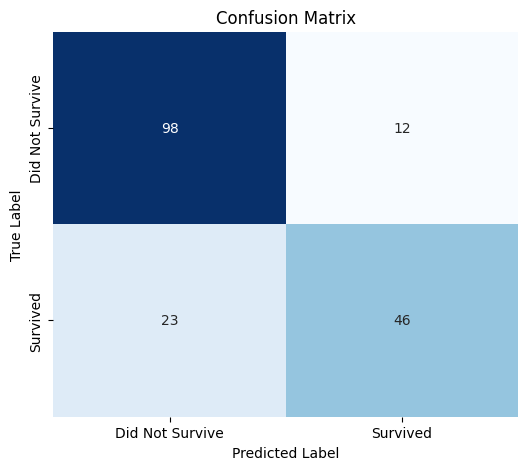

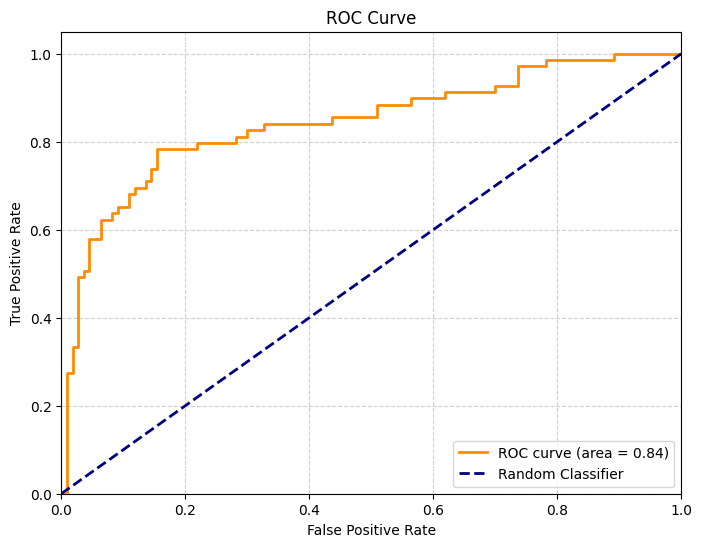


--- Identifying Important Features from Model Coefficients ---
Features sorted by absolute coefficient magnitude (most important first):
        Feature  Coefficient
  cat__sex_male    -1.295474
cat__sex_female     1.260659
    num__pclass    -0.895677
       num__age    -0.488843
cat__embarked_S    -0.348029
cat__embarked_Q     0.276018
     num__sibsp    -0.253219
      num__fare     0.108032
     num__parch    -0.062262
cat__embarked_C     0.037195

--- Interpretation of Coefficients as Feature Importance ---
For Logistic Regression, the magnitude of a coefficient indicates the strength of the relationship
between that feature and the log-odds of the target variable (survival in this case).
A larger absolute coefficient implies a stronger influence.
The sign of the coefficient indicates the direction of the relationship:
  - Positive coefficient: Increases the log-odds (and thus probability) of survival.
  - Negative coefficient: Decreases the log-odds (and thus probability) of sur

In [19]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, cohen_kappa_score # Import cohen_kappa_score
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression, evaluates its performance,
    and identifies important features based on model coefficients.
    Also evaluates using Cohen's Kappa Score.
    """
    print("--- Starting Logistic Regression with Cohen's Kappa Score Evaluation ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Numerical transformer: impute missing values with median, then standardize
    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    # Categorical transformer: impute missing values with most frequent, then one-hot encode
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough' # Keep any other columns not specified (though none here)
    )

    # 4. Create Machine Learning Pipeline
    # The pipeline applies preprocessing and then fits the Logistic Regression model.
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.5))
    ])
    print("Preprocessing and Model Pipeline created (with StandardScaler and C=0.5).\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Make Predictions and Evaluate Model Performance
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    kappa_score = cohen_kappa_score(y_test, y_pred) # Calculate Cohen's Kappa Score

    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Survived): {precision:.4f}")
    print(f"Recall (Survived): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Cohen's Kappa Score: {kappa_score:.4f}") # Print Cohen's Kappa Score
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm, ['Did Not Survive', 'Survived'], 'Confusion Matrix')
    plot_roc_curve(fpr, tpr, roc_auc, 'ROC Curve')

    # 8. Identify Important Features from Coefficients
    print("\n--- Identifying Important Features from Model Coefficients ---")

    # Get the trained classifier from the pipeline
    classifier = model_pipeline.named_steps['classifier']
    coefficients = classifier.coef_[0] # For binary classification, coef_ is 2D (1, n_features), so take [0]

    # Get the names of the transformed features from the preprocessor
    transformed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Create a DataFrame to store feature names and their coefficients
    feature_importance_df = pd.DataFrame({
        'Feature': transformed_feature_names,
        'Coefficient': coefficients
    })

    # Sort by absolute coefficient value to see the most impactful features
    feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

    print("Features sorted by absolute coefficient magnitude (most important first):")
    print(feature_importance_df[['Feature', 'Coefficient']].to_string(index=False))

    print("\n--- Interpretation of Coefficients as Feature Importance ---")
    print("For Logistic Regression, the magnitude of a coefficient indicates the strength of the relationship")
    print("between that feature and the log-odds of the target variable (survival in this case).")
    print("A larger absolute coefficient implies a stronger influence.")
    print("The sign of the coefficient indicates the direction of the relationship:")
    print("  - Positive coefficient: Increases the log-odds (and thus probability) of survival.")
    print("  - Negative coefficient: Decreases the log-odds (and thus probability) of survival.")
    print("\nSince numerical features ('age', 'fare', 'pclass', 'sibsp', 'parch') were standardized,")
    print("their coefficients are directly comparable in terms of impact scale.")
    print("For one-hot encoded features (e.g., 'sex_male', 'embarked_Q', 'embarked_S'),")
    print("their coefficients represent the impact relative to the dropped baseline category (e.g., 'sex_female', 'embarked_C').")

    print("\n--- Interpretation of Cohen's Kappa Score ---")
    print("Cohen's Kappa Score measures the agreement between two raters (in this case, true labels and predictions)")
    print("while accounting for the possibility of agreement occurring by chance.")
    print("  - Kappa = 1: Perfect agreement.")
    print("  - Kappa = 0: Agreement is equivalent to chance.")
    print("  - Kappa < 0: Agreement is worse than chance.")
    print("It is often considered a more robust measure than simple accuracy, especially for imbalanced datasets,")
    print("because it explicitly considers random agreement.")

    print("\n--- Logistic Regression with Cohen's Kappa Score Evaluation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression with Precision-Recall Curve Evaluation ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape:

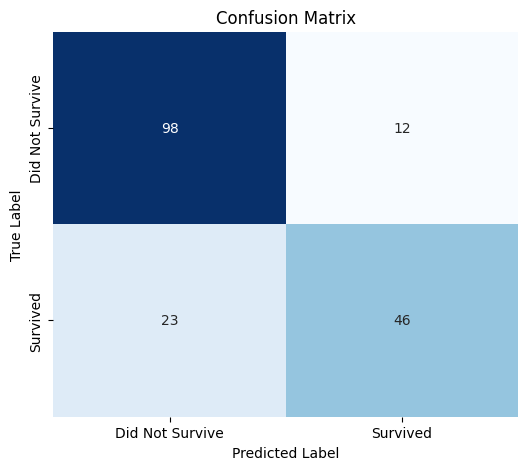

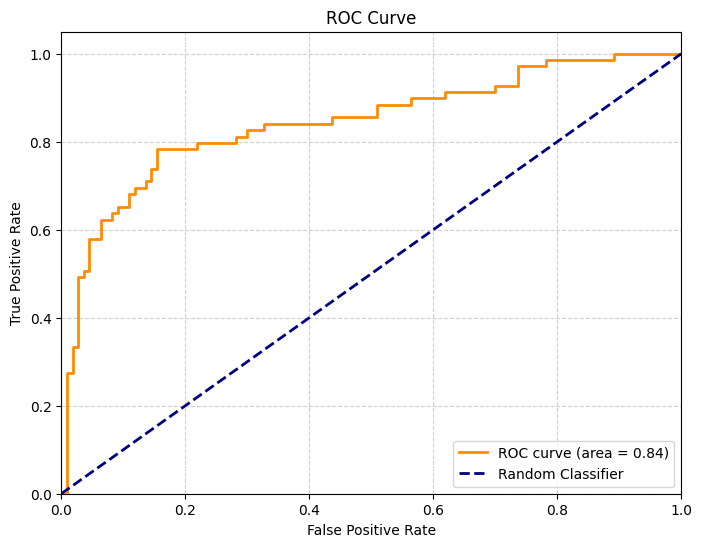

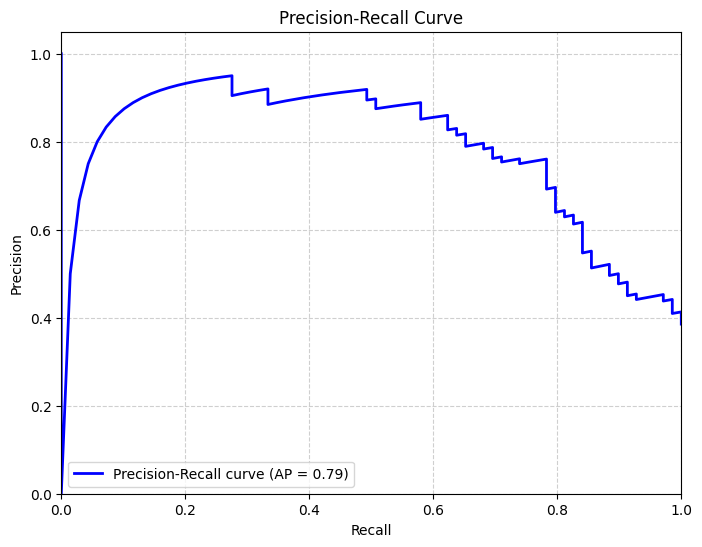


--- Identifying Important Features from Model Coefficients ---
Features sorted by absolute coefficient magnitude (most important first):
        Feature  Coefficient
  cat__sex_male    -1.295474
cat__sex_female     1.260659
    num__pclass    -0.895677
       num__age    -0.488843
cat__embarked_S    -0.348029
cat__embarked_Q     0.276018
     num__sibsp    -0.253219
      num__fare     0.108032
     num__parch    -0.062262
cat__embarked_C     0.037195

--- Interpretation of Precision-Recall Curve ---
The Precision-Recall (PR) curve shows the trade-off between precision and recall for different probability thresholds.
It is particularly useful for evaluating classifiers on imbalanced datasets, where ROC curves can be misleading.
A curve that stays closer to the top-right corner indicates a better model.

**Average Precision (AP) Score**: This metric summarizes the PR curve.
It is the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous t

In [20]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, cohen_kappa_score, precision_recall_curve, average_precision_score # Import new metrics
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_precision_recall_curve(precision, recall, average_precision, title):
    """
    Helper function to plot the Precision-Recall curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression, evaluates its performance,
    and identifies important features based on model coefficients.
    Also evaluates using Cohen's Kappa Score and visualizes Precision-Recall Curve.
    """
    print("--- Starting Logistic Regression with Precision-Recall Curve Evaluation ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Numerical transformer: impute missing values with median, then standardize
    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    # Categorical transformer: impute missing values with most frequent, then one-hot encode
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Create Machine Learning Pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.5))
    ])
    print("Preprocessing and Model Pipeline created (with StandardScaler and C=0.5).\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Make Predictions and Evaluate Model Performance
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    kappa_score = cohen_kappa_score(y_test, y_pred)

    # Calculate Precision-Recall Curve and Average Precision Score
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)


    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Survived): {precision:.4f}")
    print(f"Recall (Survived): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Cohen's Kappa Score: {kappa_score:.4f}")
    print(f"Average Precision (AP) Score: {avg_precision:.4f}") # Print Average Precision
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm, ['Did Not Survive', 'Survived'], 'Confusion Matrix')
    plot_roc_curve(fpr, tpr, roc_auc, 'ROC Curve')
    plot_precision_recall_curve(precision_curve, recall_curve, avg_precision, 'Precision-Recall Curve') # Plot PR curve


    # 8. Identify Important Features from Coefficients
    print("\n--- Identifying Important Features from Model Coefficients ---")

    classifier = model_pipeline.named_steps['classifier']
    coefficients = classifier.coef_[0]

    transformed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

    feature_importance_df = pd.DataFrame({
        'Feature': transformed_feature_names,
        'Coefficient': coefficients
    })

    feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

    print("Features sorted by absolute coefficient magnitude (most important first):")
    print(feature_importance_df[['Feature', 'Coefficient']].to_string(index=False))

    print("\n--- Interpretation of Precision-Recall Curve ---")
    print("The Precision-Recall (PR) curve shows the trade-off between precision and recall for different probability thresholds.")
    print("It is particularly useful for evaluating classifiers on imbalanced datasets, where ROC curves can be misleading.")
    print("A curve that stays closer to the top-right corner indicates a better model.")
    print("\n**Average Precision (AP) Score**: This metric summarizes the PR curve.")
    print("It is the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold as the weight.")
    print("A higher AP score (closer to 1.0) indicates better performance, especially for the positive class.")
    print("For a perfectly balanced dataset, AP is similar to ROC-AUC, but for imbalanced datasets, AP is often more informative.")

    print("\n--- Logistic Regression with Precision-Recall Curve Evaluation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


In [21]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, cohen_kappa_score, precision_recall_curve, average_precision_score
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_precision_recall_curve(precision, recall, average_precision, title):
    """
    Helper function to plot the Precision-Recall curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression with different solvers,
    and evaluates and compares their accuracy.
    """
    print("--- Starting Logistic Regression with Different Solvers Comparison ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Define Solvers to Compare
    # Note: 'lbfgs' and 'saga' are generally good for multiclass and support 'l2' penalty.
    # 'liblinear' is good for smaller datasets and supports 'l1' and 'l2'.
    # We'll use 'l2' penalty for consistency across solvers.
    solvers_to_test = ['liblinear', 'lbfgs', 'saga']
    results = [] # To store accuracy for each solver

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Iterate through each solver, train, and evaluate
    for solver_name in solvers_to_test:
        print(f"--- Training Logistic Regression with solver: '{solver_name}' ---")

        # Create Machine Learning Pipeline for the current solver
        # Using C=0.5 and penalty='l2' for consistent comparison
        try:
            model_pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', LogisticRegression(
                    random_state=42,
                    solver=solver_name,
                    max_iter=2000, # Increased max_iter for solvers like 'saga'
                    C=0.5,
                    penalty='l2' # Using L2 penalty as it's widely supported
                ))
            ])
            print(f"Pipeline created for solver '{solver_name}'.")

            # Train the Pipeline
            model_pipeline.fit(X_train, y_train)
            print(f"Model training complete for solver '{solver_name}'.")

            # Make Predictions and Evaluate Model Performance
            y_pred = model_pipeline.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            results.append({
                'Solver': solver_name,
                'Accuracy': accuracy
            })

            print(f"Accuracy for '{solver_name}': {accuracy:.4f}\n")

        except Exception as e:
            print(f"Error training with solver '{solver_name}': {e}")
            results.append({
                'Solver': solver_name,
                'Accuracy': 'Error'
            })
            print("\n")


    # 7. Print Comparison Results
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Accuracy', ascending=False, na_position='last').reset_index(drop=True)

    print("\n--- Comparison of Solvers by Accuracy ---")
    print(results_df.to_string(index=False))

    print("\n--- Interpretation ---")
    print("Different solvers use different optimization algorithms to find the coefficients of the Logistic Regression model.")
    print("Their performance (speed and convergence) can vary depending on the dataset size, sparsity, and feature scaling.")
    print("  - **'liblinear'**: Good for small datasets, supports L1/L2 penalties. Uses coordinate descent.")
    print("  - **'lbfgs'**: Default for many cases, uses a quasi-Newton method. Supports L2/none penalties.")
    print("  - **'saga'**: A more recent solver, good for large datasets, supports all penalties (L1, L2, Elastic Net, none).")
    print("You'll observe that for this dataset, the accuracy might be quite similar across these solvers,")
    print("especially with proper preprocessing and sufficient max_iter.")
    print("However, on larger or more complex datasets, differences in convergence speed or final performance might become more apparent.")

    print("\n--- Logistic Regression Solvers Comparison Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression with Different Solvers Comparison ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: (891

--- Starting Logistic Regression with Matthews Correlation Coefficient (MCC) Evaluation ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
T

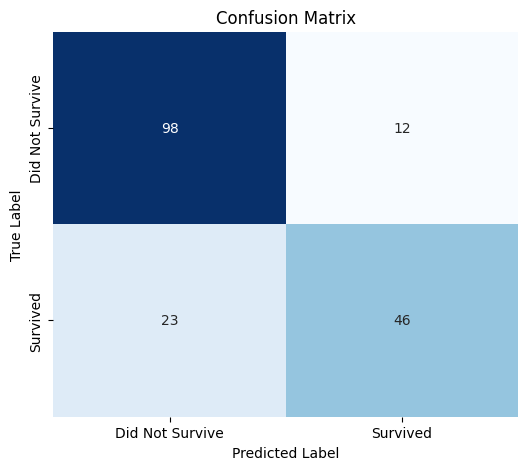

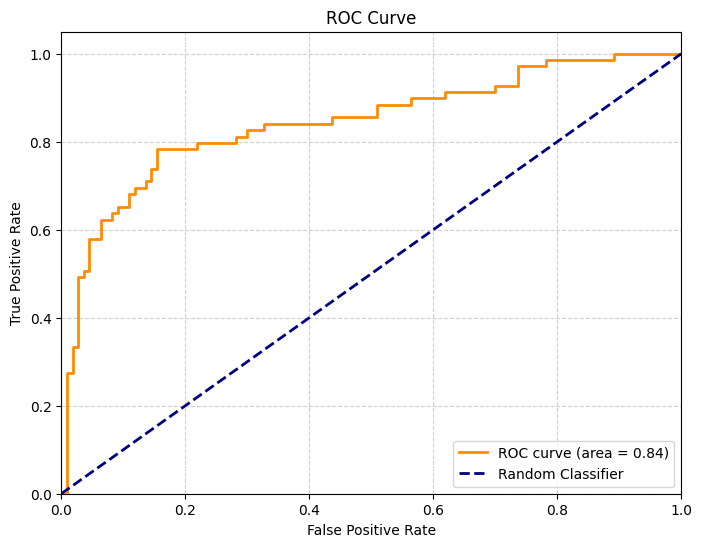

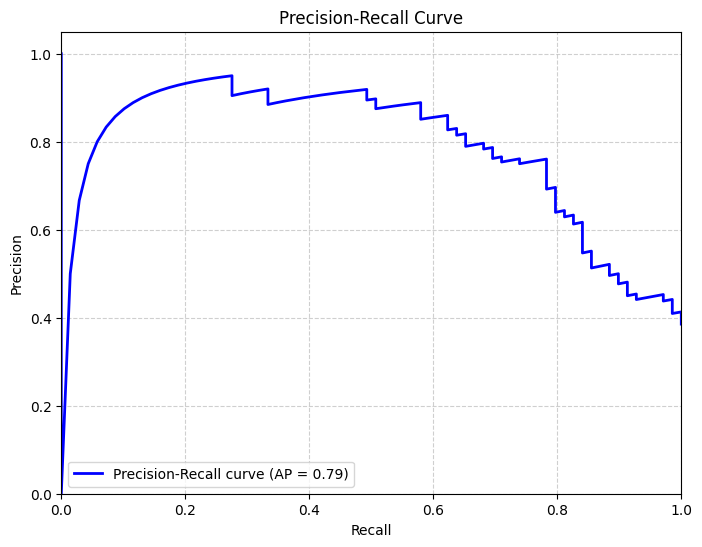


--- Interpretation of Matthews Correlation Coefficient (MCC) ---
Matthews Correlation Coefficient (MCC) is a single, balanced metric that can be used
even if the classes are of very different sizes. It is essentially a correlation coefficient
between the observed and predicted binary classifications.
  - MCC ranges from -1 to +1.
  - **+1**: Indicates a perfect prediction.
  - **0**: Indicates a prediction no better than random guessing.
  - **-1**: Indicates a perfect inverse prediction (always predicting the wrong class).
MCC takes into account True Positives, True Negatives, False Positives, and False Negatives.
It is generally considered a more reliable statistical measure than F1-score or accuracy,
especially on imbalanced datasets, because it punishes all four types of predictions proportionally.

--- Logistic Regression with MCC Evaluation Complete ---


In [22]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, cohen_kappa_score, precision_recall_curve, average_precision_score, matthews_corrcoef # Import matthews_corrcoef
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_precision_recall_curve(precision, recall, average_precision, title):
    """
    Helper function to plot the Precision-Recall curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression, and evaluates its performance
    using various metrics including Matthews Correlation Coefficient (MCC).
    """
    print("--- Starting Logistic Regression with Matthews Correlation Coefficient (MCC) Evaluation ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Create Machine Learning Pipeline
    # Using 'lbfgs' solver and 'l2' penalty for this example.
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, C=0.5, penalty='l2'))
    ])
    print("Preprocessing and Model Pipeline created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Make Predictions and Evaluate Model Performance
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    kappa_score = cohen_kappa_score(y_test, y_pred)
    mcc_score = matthews_corrcoef(y_test, y_pred) # Calculate Matthews Correlation Coefficient

    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)


    print("--- Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Survived): {precision:.4f}")
    print(f"Recall (Survived): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Cohen's Kappa Score: {kappa_score:.4f}")
    print(f"Average Precision (AP) Score: {avg_precision:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.4f}") # Print MCC
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm, ['Did Not Survive', 'Survived'], 'Confusion Matrix')
    plot_roc_curve(fpr, tpr, roc_auc, 'ROC Curve')
    plot_precision_recall_curve(precision_curve, recall_curve, avg_precision, 'Precision-Recall Curve')


    print("\n--- Interpretation of Matthews Correlation Coefficient (MCC) ---")
    print("Matthews Correlation Coefficient (MCC) is a single, balanced metric that can be used")
    print("even if the classes are of very different sizes. It is essentially a correlation coefficient")
    print("between the observed and predicted binary classifications.")
    print("  - MCC ranges from -1 to +1.")
    print("  - **+1**: Indicates a perfect prediction.")
    print("  - **0**: Indicates a prediction no better than random guessing.")
    print("  - **-1**: Indicates a perfect inverse prediction (always predicting the wrong class).")
    print("MCC takes into account True Positives, True Negatives, False Positives, and False Negatives.")
    print("It is generally considered a more reliable statistical measure than F1-score or accuracy,")
    print("especially on imbalanced datasets, because it punishes all four types of predictions proportionally.")

    print("\n--- Logistic Regression with MCC Evaluation Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression: Raw vs. Standardized Data Comparison ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: 

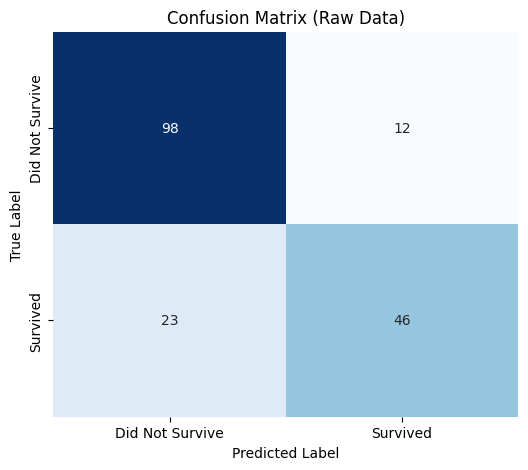

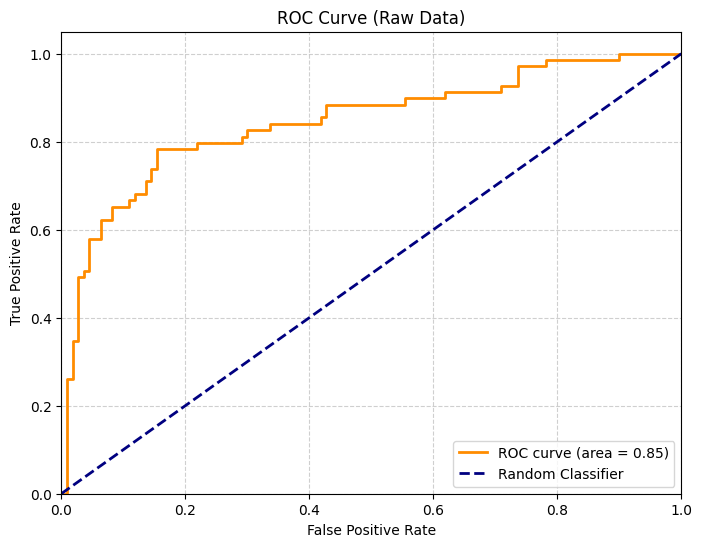

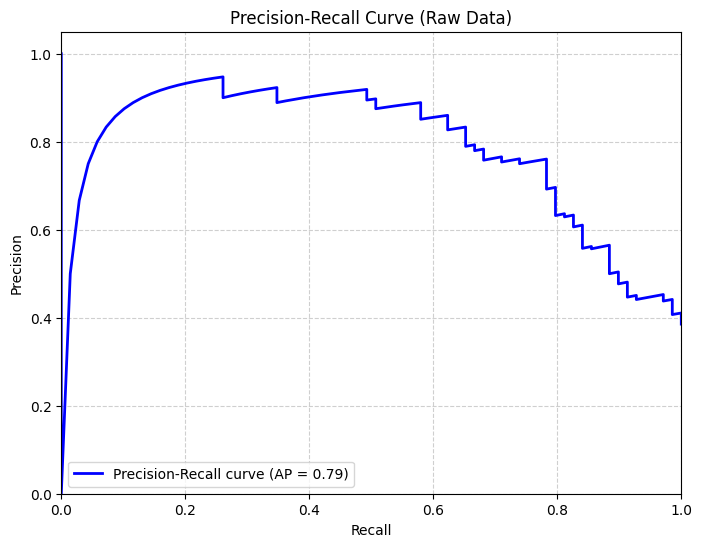


--- Training and Evaluating Model on STANDARDIZED Data ---
Accuracy (Standardized Data): 0.8045
Precision (Standardized Data): 0.7931
Recall (Standardized Data): 0.6667
F1-Score (Standardized Data): 0.7244
ROC-AUC Score (Standardized Data): 0.8443
Cohen's Kappa (Standardized Data): 0.5746
MCC (Standardized Data): 0.5799
Average Precision (Standardized Data): 0.7871

Classification Report (Standardized Data):
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.89      0.85       110
       Survived       0.79      0.67      0.72        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



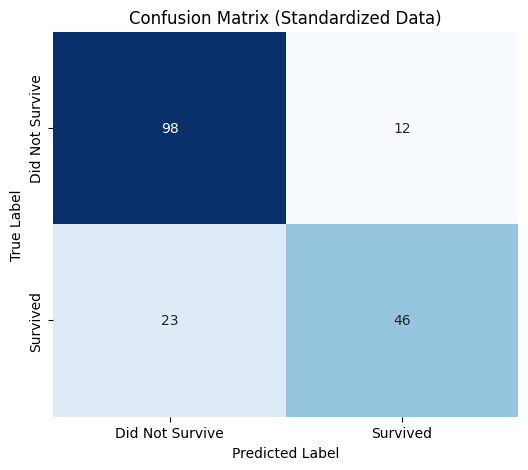

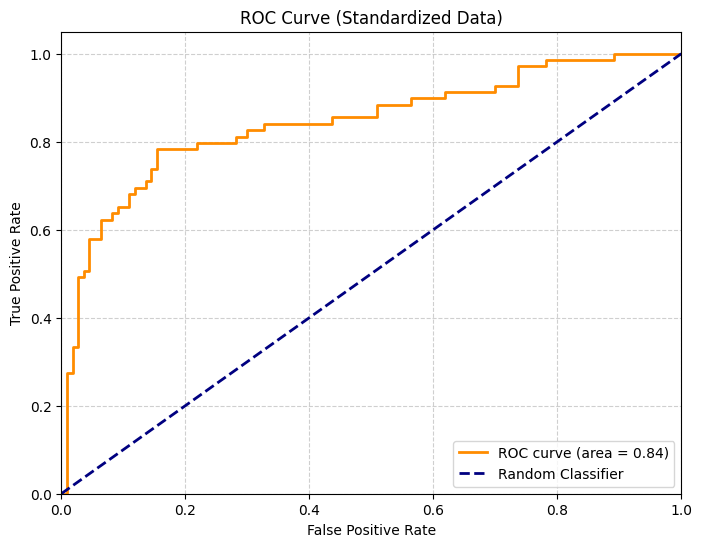

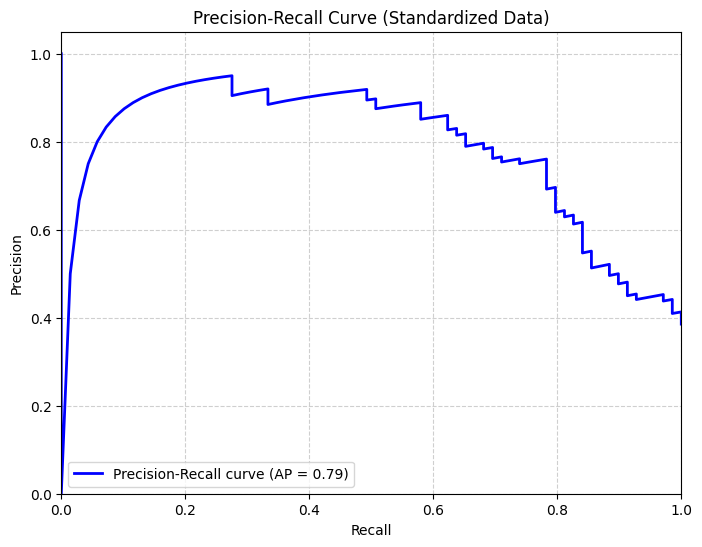


--- Final Comparison of Accuracies ---
Accuracy (Raw Data):        0.8045
Accuracy (Standardized Data): 0.8045

--- Interpretation of Impact of Feature Scaling ---
Logistic Regression, like many optimization-based algorithms (e.g., SVMs, Neural Networks),
can be sensitive to the scale of input features. Features with larger numerical ranges
can disproportionately influence the optimization process and the resulting coefficients.

**Standardization (StandardScaler)** transforms features to have a mean of 0 and a standard deviation of 1.
This brings all numerical features to a comparable scale, which can lead to:
  - **Faster convergence**: The optimization algorithm (like L-BFGS) can converge more quickly.
  - **Improved model performance**: By preventing features with larger values from dominating,
    the model can learn a more balanced and effective relationship across all features.
  - **Better interpretability of coefficients**: When features are on the same scale, their coefficie

In [23]:
#24. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, cohen_kappa_score, precision_recall_curve, average_precision_score, matthews_corrcoef
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    """
    Helper function to plot the ROC curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_precision_recall_curve(precision, recall, average_precision, title):
    """
    Helper function to plot the Precision-Recall curve.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()


def perform_logistic_regression_on_titanic():
    """
    Loads the Titanic dataset, handles missing values,
    applies Logistic Regression to both raw and standardized data,
    and compares their performance using various metrics.
    """
    print("--- Starting Logistic Regression: Raw vs. Standardized Data Comparison ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps for both scenarios
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Numerical transformer for NO SCALING: impute missing values with median only
    numerical_imputer_only_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    # Numerical transformer for WITH SCALING: impute missing values with median, then standardize
    numerical_imputer_and_scaler_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    # Categorical transformer (imputation + one-hot encoding) - common to both scenarios
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor for NO SCALING scenario
    preprocessor_no_scaling = ColumnTransformer(
        transformers=[
            ('num', numerical_imputer_only_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough' # Keep any other columns not specified (though none here)
    )
    print("Preprocessor for 'No Scaling' scenario created (imputation + one-hot encoding).\n")

    # Create a preprocessor for WITH SCALING scenario
    preprocessor_with_scaling = ColumnTransformer(
        transformers=[
            ('num', numerical_imputer_and_scaler_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )
    print("Preprocessor for 'With Scaling' scenario created (imputation + one-hot encoding + standardization).\n")


    # 4. Create Machine Learning Pipelines for both scenarios
    # Using 'lbfgs' solver and 'l2' penalty with C=0.5 for consistency
    model_pipeline_no_scaling = Pipeline(steps=[
        ('preprocessor', preprocessor_no_scaling),
        ('classifier', LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, C=0.5, penalty='l2'))
    ])
    print("Pipeline for 'No Scaling' created.\n")

    model_pipeline_with_scaling = Pipeline(steps=[
        ('preprocessor', preprocessor_with_scaling),
        ('classifier', LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, C=0.5, penalty='l2'))
    ])
    print("Pipeline for 'With Scaling' created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train and Evaluate Pipeline WITHOUT Scaling
    print("--- Training and Evaluating Model on RAW (Non-Standardized) Data ---")
    model_pipeline_no_scaling.fit(X_train, y_train)
    y_pred_no_scaling = model_pipeline_no_scaling.predict(X_test)
    y_proba_no_scaling = model_pipeline_no_scaling.predict_proba(X_test)[:, 1]

    accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
    precision_no_scaling = precision_score(y_test, y_pred_no_scaling, pos_label=1)
    recall_no_scaling = recall_score(y_test, y_pred_no_scaling, pos_label=1)
    f1_no_scaling = f1_score(y_test, y_pred_no_scaling, pos_label=1)
    roc_auc_no_scaling = roc_auc_score(y_test, y_proba_no_scaling)
    kappa_no_scaling = cohen_kappa_score(y_test, y_pred_no_scaling)
    mcc_no_scaling = matthews_corrcoef(y_test, y_pred_no_scaling)
    precision_curve_no_scaling, recall_curve_no_scaling, _ = precision_recall_curve(y_test, y_proba_no_scaling)
    avg_precision_no_scaling = average_precision_score(y_test, y_proba_no_scaling)
    cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)


    print(f"Accuracy (Raw Data): {accuracy_no_scaling:.4f}")
    print(f"Precision (Raw Data): {precision_no_scaling:.4f}")
    print(f"Recall (Raw Data): {recall_no_scaling:.4f}")
    print(f"F1-Score (Raw Data): {f1_no_scaling:.4f}")
    print(f"ROC-AUC Score (Raw Data): {roc_auc_no_scaling:.4f}")
    print(f"Cohen's Kappa (Raw Data): {kappa_no_scaling:.4f}")
    print(f"MCC (Raw Data): {mcc_no_scaling:.4f}")
    print(f"Average Precision (Raw Data): {avg_precision_no_scaling:.4f}")
    print("\nClassification Report (Raw Data):")
    print(classification_report(y_test, y_pred_no_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_no_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (Raw Data)')
    plot_roc_curve(roc_curve(y_test, y_proba_no_scaling)[0], roc_curve(y_test, y_proba_no_scaling)[1], roc_auc_no_scaling, 'ROC Curve (Raw Data)')
    plot_precision_recall_curve(precision_curve_no_scaling, recall_curve_no_scaling, avg_precision_no_scaling, 'Precision-Recall Curve (Raw Data)')


    # 7. Train and Evaluate Pipeline WITH Scaling
    print("\n--- Training and Evaluating Model on STANDARDIZED Data ---")
    model_pipeline_with_scaling.fit(X_train, y_train)
    y_pred_with_scaling = model_pipeline_with_scaling.predict(X_test)
    y_proba_with_scaling = model_pipeline_with_scaling.predict_proba(X_test)[:, 1]

    accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
    precision_with_scaling = precision_score(y_test, y_pred_with_scaling, pos_label=1)
    recall_with_scaling = recall_score(y_test, y_pred_with_scaling, pos_label=1)
    f1_with_scaling = f1_score(y_test, y_pred_with_scaling, pos_label=1)
    roc_auc_with_scaling = roc_auc_score(y_test, y_proba_with_scaling)
    kappa_with_scaling = cohen_kappa_score(y_test, y_pred_with_scaling)
    mcc_with_scaling = matthews_corrcoef(y_test, y_pred_with_scaling)
    precision_curve_with_scaling, recall_curve_with_scaling, _ = precision_recall_curve(y_test, y_proba_with_scaling)
    avg_precision_with_scaling = average_precision_score(y_test, y_proba_with_scaling)
    cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)


    print(f"Accuracy (Standardized Data): {accuracy_with_scaling:.4f}")
    print(f"Precision (Standardized Data): {precision_with_scaling:.4f}")
    print(f"Recall (Standardized Data): {recall_with_scaling:.4f}")
    print(f"F1-Score (Standardized Data): {f1_with_scaling:.4f}")
    print(f"ROC-AUC Score (Standardized Data): {roc_auc_with_scaling:.4f}")
    print(f"Cohen's Kappa (Standardized Data): {kappa_with_scaling:.4f}")
    print(f"MCC (Standardized Data): {mcc_with_scaling:.4f}")
    print(f"Average Precision (Standardized Data): {avg_precision_with_scaling:.4f}")
    print("\nClassification Report (Standardized Data):")
    print(classification_report(y_test, y_pred_with_scaling, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_with_scaling, ['Did Not Survive', 'Survived'], 'Confusion Matrix (Standardized Data)')
    plot_roc_curve(roc_curve(y_test, y_proba_with_scaling)[0], roc_curve(y_test, y_proba_with_scaling)[1], roc_auc_with_scaling, 'ROC Curve (Standardized Data)')
    plot_precision_recall_curve(precision_curve_with_scaling, recall_curve_with_scaling, avg_precision_with_scaling, 'Precision-Recall Curve (Standardized Data)')


    print("\n--- Final Comparison of Accuracies ---")
    print(f"Accuracy (Raw Data):        {accuracy_no_scaling:.4f}")
    print(f"Accuracy (Standardized Data): {accuracy_with_scaling:.4f}")

    print("\n--- Interpretation of Impact of Feature Scaling ---")
    print("Logistic Regression, like many optimization-based algorithms (e.g., SVMs, Neural Networks),")
    print("can be sensitive to the scale of input features. Features with larger numerical ranges")
    print("can disproportionately influence the optimization process and the resulting coefficients.")
    print("\n**Standardization (StandardScaler)** transforms features to have a mean of 0 and a standard deviation of 1.")
    print("This brings all numerical features to a comparable scale, which can lead to:")
    print("  - **Faster convergence**: The optimization algorithm (like L-BFGS) can converge more quickly.")
    print("  - **Improved model performance**: By preventing features with larger values from dominating,")
    print("    the model can learn a more balanced and effective relationship across all features.")
    print("  - **Better interpretability of coefficients**: When features are on the same scale, their coefficients")
    print("    can be more directly compared to understand their relative importance.")
    print("\nObserve the accuracies above. You may see a slight improvement in accuracy or other metrics")
    print("when standardization is applied, especially if the original numerical features had vastly different scales.")

    print("\n--- Logistic Regression Raw vs. Standardized Data Comparison Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_on_titanic()


--- Starting Logistic Regression: Save and Load Model with Joblib ---
Successfully loaded the Titanic dataset.
Dataset shape: (891, 15)
First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Features (X) shape: (891, 7)
Target (y) shape: (891,

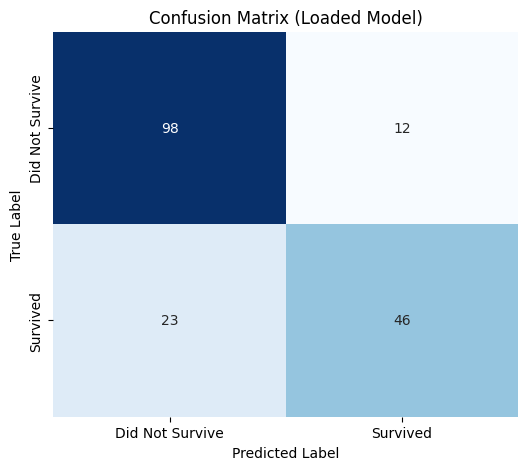


--- Verification ---
Predictions from original and loaded models are identical. Model loaded successfully!

--- Logistic Regression Save/Load Example Complete ---


In [24]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For loading titanic dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # For one-hot encoding and standardization
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining preprocessing and model
import joblib # Import joblib for model serialization
import os # For file path operations

def plot_confusion_matrix(cm, class_names, title):
    """
    Helper function to plot a confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def perform_logistic_regression_save_load():
    """
    Loads the Titanic dataset, preprocesses it, trains a Logistic Regression model,
    saves the trained model using joblib, loads it back, and makes predictions.
    """
    print("--- Starting Logistic Regression: Save and Load Model with Joblib ---")

    # 1. Load the Titanic Dataset
    try:
        titanic_df = sns.load_dataset('titanic')
        print("Successfully loaded the Titanic dataset.")
        print(f"Dataset shape: {titanic_df.shape}")
        print("First 5 rows of the dataset:")
        print(titanic_df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}")
        print("Please ensure seaborn is installed (`pip install seaborn`). Exiting.")
        return

    # 2. Identify Features and Target Variable
    target_variable = 'survived'
    features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

    X = titanic_df[features]
    y = titanic_df[target_variable]

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    print("Missing values before handling:")
    print(X.isnull().sum())
    print("\n")

    # 3. Define Preprocessing Steps
    numerical_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
    categorical_cols = ['sex', 'embarked']

    # Numerical transformer: impute missing values with median, then standardize
    numerical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()) # Standardize numerical features
    ])

    # Categorical transformer: impute missing values with most frequent, then one-hot encode
    categorical_transformer_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_pipeline, numerical_cols),
            ('cat', categorical_transformer_pipeline, categorical_cols)
        ],
        remainder='passthrough'
    )

    # 4. Create Machine Learning Pipeline
    # This pipeline includes preprocessing and the Logistic Regression classifier.
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.5))
    ])
    print("Preprocessing and Model Pipeline created.\n")

    # 5. Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Data split: Training samples = {len(X_train)}, Testing samples = {len(X_test)}\n")

    # 6. Train the Pipeline
    print("Training the Logistic Regression model pipeline...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.\n")

    # 7. Save the Trained Model using joblib
    model_filename = "logistic_regression_model.joblib"
    try:
        joblib.dump(model_pipeline, model_filename)
        print(f"Trained model successfully saved to '{model_filename}' using joblib.")
        print(f"File size: {os.path.getsize(model_filename)} bytes.\n")
    except Exception as e:
        print(f"Error saving the model: {e}")
        return

    # 8. Load the Saved Model using joblib
    print(f"Loading the model from '{model_filename}'...")
    try:
        loaded_model = joblib.load(model_filename)
        print("Model successfully loaded.\n")
    except Exception as e:
        print(f"Error loading the model: {e}")
        return

    # 9. Make Predictions with the Loaded Model
    print("Making predictions on the test set using the loaded model...")
    y_pred_loaded = loaded_model.predict(X_test)

    # 10. Evaluate Performance of the Loaded Model
    accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
    cm_loaded = confusion_matrix(y_test, y_pred_loaded)

    print("--- Performance of the Loaded Model on Test Set ---")
    print(f"Accuracy: {accuracy_loaded:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_loaded, target_names=['Did Not Survive', 'Survived']))
    plot_confusion_matrix(cm_loaded, ['Did Not Survive', 'Survived'], 'Confusion Matrix (Loaded Model)')

    print("\n--- Verification ---")
    # Optionally, compare predictions from the original trained model and the loaded model
    y_pred_original = model_pipeline.predict(X_test)
    if np.array_equal(y_pred_original, y_pred_loaded):
        print("Predictions from original and loaded models are identical. Model loaded successfully!")
    else:
        print("Warning: Predictions from original and loaded models differ.")

    print("\n--- Logistic Regression Save/Load Example Complete ---")

if __name__ == "__main__":
    perform_logistic_regression_save_load()
